## Question 1

### Exercise 1

At first let's load the data from the file letter.data.

Here we create the functions that process the data from the file.

In [1]:
import numpy as np
import matplotlib.pyplot as plot
import torch

In [2]:
def get_x_y_i(line_new):
    if int(line_new[5]) <= 7:
        x_i_train = line_new[6:].astype(float)

        y_i_train = ord(line_new[1]) - ord('a') + 1

        return x_i_train, y_i_train, 'train'

    if int(line_new[5]) == 8:
        x_i_validation = line_new[6:].astype(float)

        y_i_validation = ord(line_new[1]) - ord('a') + 1

        return x_i_validation, y_i_validation, 'validation'

    if int(line_new[5]) == 9:
        x_i_test = line_new[6:].astype(float)

        y_i_test = ord(line_new[1]) - ord('a') + 1

        return x_i_test, y_i_test, 'test'


def get_data(f):

    init_train = False
    init_val = False
    init_test = False

    line_new = np.array([])
    num_str = ''
    new_character = 0
    count = 1

    for line in f:
        count += 1
        print('loading example nº', count)
        for j in range(len(line)):
            if j == 0:
                new_character = 0

            if not(line[j] == ' ' or line[j] == '\t' or line[j] == '\n'):

                num_str = num_str + line[j]

            else:
                new_character = 1

            if (new_character == 1) and (num_str != ''):
                if ord(num_str[0]) >= 97:
                    line_new = np.append(line_new, num_str) #letter
                else:
                    line_new = np.append(line_new, int(num_str)) #number

                new_character = 0
                num_str = ''

        [x_i, y_i, fold] = get_x_y_i(line_new)

        line_new = np.array([])

        if fold == 'train':
            if not init_train:
                X_train = x_i
                Y_train = y_i
                init_train = True
            else:
                X_train = np.vstack((X_train, x_i))
                Y_train = np.vstack((Y_train, y_i))

        if fold == 'validation':
            if not init_val:
                X_validation = x_i
                Y_validation = y_i
                init_val = True
            else:
                X_validation = np.vstack((X_validation, x_i))
                Y_validation = np.vstack((Y_validation, y_i))

        if fold == 'test':
            if not init_test:
                X_test = x_i
                Y_test = y_i
                init_test = True
            else:
                X_test = np.vstack((X_test, x_i))
                Y_test = np.vstack((Y_test, y_i))

    return X_train, X_validation, X_test, Y_train, Y_validation, Y_test

Now let's load the data.

In [3]:
f = open('letter.data')

[X_train, X_validation, X_test, Y_train, Y_validation, Y_test] = get_data(f)

loading example nº 2
loading example nº 3
loading example nº 4
loading example nº 5
loading example nº 6
loading example nº 7
loading example nº 8
loading example nº 9
loading example nº 10
loading example nº 11
loading example nº 12
loading example nº 13
loading example nº 14
loading example nº 15
loading example nº 16
loading example nº 17
loading example nº 18
loading example nº 19
loading example nº 20
loading example nº 21
loading example nº 22
loading example nº 23
loading example nº 24
loading example nº 25
loading example nº 26
loading example nº 27
loading example nº 28
loading example nº 29
loading example nº 30
loading example nº 31
loading example nº 32
loading example nº 33
loading example nº 34
loading example nº 35
loading example nº 36
loading example nº 37
loading example nº 38
loading example nº 39
loading example nº 40
loading example nº 41
loading example nº 42
loading example nº 43
loading example nº 44
loading example nº 45
loading example nº 46
loading example nº

loading example nº 396
loading example nº 397
loading example nº 398
loading example nº 399
loading example nº 400
loading example nº 401
loading example nº 402
loading example nº 403
loading example nº 404
loading example nº 405
loading example nº 406
loading example nº 407
loading example nº 408
loading example nº 409
loading example nº 410
loading example nº 411
loading example nº 412
loading example nº 413
loading example nº 414
loading example nº 415
loading example nº 416
loading example nº 417
loading example nº 418
loading example nº 419
loading example nº 420
loading example nº 421
loading example nº 422
loading example nº 423
loading example nº 424
loading example nº 425
loading example nº 426
loading example nº 427
loading example nº 428
loading example nº 429
loading example nº 430
loading example nº 431
loading example nº 432
loading example nº 433
loading example nº 434
loading example nº 435
loading example nº 436
loading example nº 437
loading example nº 438
loading exa

loading example nº 789
loading example nº 790
loading example nº 791
loading example nº 792
loading example nº 793
loading example nº 794
loading example nº 795
loading example nº 796
loading example nº 797
loading example nº 798
loading example nº 799
loading example nº 800
loading example nº 801
loading example nº 802
loading example nº 803
loading example nº 804
loading example nº 805
loading example nº 806
loading example nº 807
loading example nº 808
loading example nº 809
loading example nº 810
loading example nº 811
loading example nº 812
loading example nº 813
loading example nº 814
loading example nº 815
loading example nº 816
loading example nº 817
loading example nº 818
loading example nº 819
loading example nº 820
loading example nº 821
loading example nº 822
loading example nº 823
loading example nº 824
loading example nº 825
loading example nº 826
loading example nº 827
loading example nº 828
loading example nº 829
loading example nº 830
loading example nº 831
loading exa

loading example nº 1156
loading example nº 1157
loading example nº 1158
loading example nº 1159
loading example nº 1160
loading example nº 1161
loading example nº 1162
loading example nº 1163
loading example nº 1164
loading example nº 1165
loading example nº 1166
loading example nº 1167
loading example nº 1168
loading example nº 1169
loading example nº 1170
loading example nº 1171
loading example nº 1172
loading example nº 1173
loading example nº 1174
loading example nº 1175
loading example nº 1176
loading example nº 1177
loading example nº 1178
loading example nº 1179
loading example nº 1180
loading example nº 1181
loading example nº 1182
loading example nº 1183
loading example nº 1184
loading example nº 1185
loading example nº 1186
loading example nº 1187
loading example nº 1188
loading example nº 1189
loading example nº 1190
loading example nº 1191
loading example nº 1192
loading example nº 1193
loading example nº 1194
loading example nº 1195
loading example nº 1196
loading example 

loading example nº 1573
loading example nº 1574
loading example nº 1575
loading example nº 1576
loading example nº 1577
loading example nº 1578
loading example nº 1579
loading example nº 1580
loading example nº 1581
loading example nº 1582
loading example nº 1583
loading example nº 1584
loading example nº 1585
loading example nº 1586
loading example nº 1587
loading example nº 1588
loading example nº 1589
loading example nº 1590
loading example nº 1591
loading example nº 1592
loading example nº 1593
loading example nº 1594
loading example nº 1595
loading example nº 1596
loading example nº 1597
loading example nº 1598
loading example nº 1599
loading example nº 1600
loading example nº 1601
loading example nº 1602
loading example nº 1603
loading example nº 1604
loading example nº 1605
loading example nº 1606
loading example nº 1607
loading example nº 1608
loading example nº 1609
loading example nº 1610
loading example nº 1611
loading example nº 1612
loading example nº 1613
loading example 

loading example nº 1952
loading example nº 1953
loading example nº 1954
loading example nº 1955
loading example nº 1956
loading example nº 1957
loading example nº 1958
loading example nº 1959
loading example nº 1960
loading example nº 1961
loading example nº 1962
loading example nº 1963
loading example nº 1964
loading example nº 1965
loading example nº 1966
loading example nº 1967
loading example nº 1968
loading example nº 1969
loading example nº 1970
loading example nº 1971
loading example nº 1972
loading example nº 1973
loading example nº 1974
loading example nº 1975
loading example nº 1976
loading example nº 1977
loading example nº 1978
loading example nº 1979
loading example nº 1980
loading example nº 1981
loading example nº 1982
loading example nº 1983
loading example nº 1984
loading example nº 1985
loading example nº 1986
loading example nº 1987
loading example nº 1988
loading example nº 1989
loading example nº 1990
loading example nº 1991
loading example nº 1992
loading example 

loading example nº 2310
loading example nº 2311
loading example nº 2312
loading example nº 2313
loading example nº 2314
loading example nº 2315
loading example nº 2316
loading example nº 2317
loading example nº 2318
loading example nº 2319
loading example nº 2320
loading example nº 2321
loading example nº 2322
loading example nº 2323
loading example nº 2324
loading example nº 2325
loading example nº 2326
loading example nº 2327
loading example nº 2328
loading example nº 2329
loading example nº 2330
loading example nº 2331
loading example nº 2332
loading example nº 2333
loading example nº 2334
loading example nº 2335
loading example nº 2336
loading example nº 2337
loading example nº 2338
loading example nº 2339
loading example nº 2340
loading example nº 2341
loading example nº 2342
loading example nº 2343
loading example nº 2344
loading example nº 2345
loading example nº 2346
loading example nº 2347
loading example nº 2348
loading example nº 2349
loading example nº 2350
loading example 

loading example nº 2652
loading example nº 2653
loading example nº 2654
loading example nº 2655
loading example nº 2656
loading example nº 2657
loading example nº 2658
loading example nº 2659
loading example nº 2660
loading example nº 2661
loading example nº 2662
loading example nº 2663
loading example nº 2664
loading example nº 2665
loading example nº 2666
loading example nº 2667
loading example nº 2668
loading example nº 2669
loading example nº 2670
loading example nº 2671
loading example nº 2672
loading example nº 2673
loading example nº 2674
loading example nº 2675
loading example nº 2676
loading example nº 2677
loading example nº 2678
loading example nº 2679
loading example nº 2680
loading example nº 2681
loading example nº 2682
loading example nº 2683
loading example nº 2684
loading example nº 2685
loading example nº 2686
loading example nº 2687
loading example nº 2688
loading example nº 2689
loading example nº 2690
loading example nº 2691
loading example nº 2692
loading example 

loading example nº 3021
loading example nº 3022
loading example nº 3023
loading example nº 3024
loading example nº 3025
loading example nº 3026
loading example nº 3027
loading example nº 3028
loading example nº 3029
loading example nº 3030
loading example nº 3031
loading example nº 3032
loading example nº 3033
loading example nº 3034
loading example nº 3035
loading example nº 3036
loading example nº 3037
loading example nº 3038
loading example nº 3039
loading example nº 3040
loading example nº 3041
loading example nº 3042
loading example nº 3043
loading example nº 3044
loading example nº 3045
loading example nº 3046
loading example nº 3047
loading example nº 3048
loading example nº 3049
loading example nº 3050
loading example nº 3051
loading example nº 3052
loading example nº 3053
loading example nº 3054
loading example nº 3055
loading example nº 3056
loading example nº 3057
loading example nº 3058
loading example nº 3059
loading example nº 3060
loading example nº 3061
loading example 

loading example nº 3403
loading example nº 3404
loading example nº 3405
loading example nº 3406
loading example nº 3407
loading example nº 3408
loading example nº 3409
loading example nº 3410
loading example nº 3411
loading example nº 3412
loading example nº 3413
loading example nº 3414
loading example nº 3415
loading example nº 3416
loading example nº 3417
loading example nº 3418
loading example nº 3419
loading example nº 3420
loading example nº 3421
loading example nº 3422
loading example nº 3423
loading example nº 3424
loading example nº 3425
loading example nº 3426
loading example nº 3427
loading example nº 3428
loading example nº 3429
loading example nº 3430
loading example nº 3431
loading example nº 3432
loading example nº 3433
loading example nº 3434
loading example nº 3435
loading example nº 3436
loading example nº 3437
loading example nº 3438
loading example nº 3439
loading example nº 3440
loading example nº 3441
loading example nº 3442
loading example nº 3443
loading example 

loading example nº 3757
loading example nº 3758
loading example nº 3759
loading example nº 3760
loading example nº 3761
loading example nº 3762
loading example nº 3763
loading example nº 3764
loading example nº 3765
loading example nº 3766
loading example nº 3767
loading example nº 3768
loading example nº 3769
loading example nº 3770
loading example nº 3771
loading example nº 3772
loading example nº 3773
loading example nº 3774
loading example nº 3775
loading example nº 3776
loading example nº 3777
loading example nº 3778
loading example nº 3779
loading example nº 3780
loading example nº 3781
loading example nº 3782
loading example nº 3783
loading example nº 3784
loading example nº 3785
loading example nº 3786
loading example nº 3787
loading example nº 3788
loading example nº 3789
loading example nº 3790
loading example nº 3791
loading example nº 3792
loading example nº 3793
loading example nº 3794
loading example nº 3795
loading example nº 3796
loading example nº 3797
loading example 

loading example nº 4113
loading example nº 4114
loading example nº 4115
loading example nº 4116
loading example nº 4117
loading example nº 4118
loading example nº 4119
loading example nº 4120
loading example nº 4121
loading example nº 4122
loading example nº 4123
loading example nº 4124
loading example nº 4125
loading example nº 4126
loading example nº 4127
loading example nº 4128
loading example nº 4129
loading example nº 4130
loading example nº 4131
loading example nº 4132
loading example nº 4133
loading example nº 4134
loading example nº 4135
loading example nº 4136
loading example nº 4137
loading example nº 4138
loading example nº 4139
loading example nº 4140
loading example nº 4141
loading example nº 4142
loading example nº 4143
loading example nº 4144
loading example nº 4145
loading example nº 4146
loading example nº 4147
loading example nº 4148
loading example nº 4149
loading example nº 4150
loading example nº 4151
loading example nº 4152
loading example nº 4153
loading example 

loading example nº 4461
loading example nº 4462
loading example nº 4463
loading example nº 4464
loading example nº 4465
loading example nº 4466
loading example nº 4467
loading example nº 4468
loading example nº 4469
loading example nº 4470
loading example nº 4471
loading example nº 4472
loading example nº 4473
loading example nº 4474
loading example nº 4475
loading example nº 4476
loading example nº 4477
loading example nº 4478
loading example nº 4479
loading example nº 4480
loading example nº 4481
loading example nº 4482
loading example nº 4483
loading example nº 4484
loading example nº 4485
loading example nº 4486
loading example nº 4487
loading example nº 4488
loading example nº 4489
loading example nº 4490
loading example nº 4491
loading example nº 4492
loading example nº 4493
loading example nº 4494
loading example nº 4495
loading example nº 4496
loading example nº 4497
loading example nº 4498
loading example nº 4499
loading example nº 4500
loading example nº 4501
loading example 

loading example nº 4846
loading example nº 4847
loading example nº 4848
loading example nº 4849
loading example nº 4850
loading example nº 4851
loading example nº 4852
loading example nº 4853
loading example nº 4854
loading example nº 4855
loading example nº 4856
loading example nº 4857
loading example nº 4858
loading example nº 4859
loading example nº 4860
loading example nº 4861
loading example nº 4862
loading example nº 4863
loading example nº 4864
loading example nº 4865
loading example nº 4866
loading example nº 4867
loading example nº 4868
loading example nº 4869
loading example nº 4870
loading example nº 4871
loading example nº 4872
loading example nº 4873
loading example nº 4874
loading example nº 4875
loading example nº 4876
loading example nº 4877
loading example nº 4878
loading example nº 4879
loading example nº 4880
loading example nº 4881
loading example nº 4882
loading example nº 4883
loading example nº 4884
loading example nº 4885
loading example nº 4886
loading example 

loading example nº 5222
loading example nº 5223
loading example nº 5224
loading example nº 5225
loading example nº 5226
loading example nº 5227
loading example nº 5228
loading example nº 5229
loading example nº 5230
loading example nº 5231
loading example nº 5232
loading example nº 5233
loading example nº 5234
loading example nº 5235
loading example nº 5236
loading example nº 5237
loading example nº 5238
loading example nº 5239
loading example nº 5240
loading example nº 5241
loading example nº 5242
loading example nº 5243
loading example nº 5244
loading example nº 5245
loading example nº 5246
loading example nº 5247
loading example nº 5248
loading example nº 5249
loading example nº 5250
loading example nº 5251
loading example nº 5252
loading example nº 5253
loading example nº 5254
loading example nº 5255
loading example nº 5256
loading example nº 5257
loading example nº 5258
loading example nº 5259
loading example nº 5260
loading example nº 5261
loading example nº 5262
loading example 

loading example nº 5592
loading example nº 5593
loading example nº 5594
loading example nº 5595
loading example nº 5596
loading example nº 5597
loading example nº 5598
loading example nº 5599
loading example nº 5600
loading example nº 5601
loading example nº 5602
loading example nº 5603
loading example nº 5604
loading example nº 5605
loading example nº 5606
loading example nº 5607
loading example nº 5608
loading example nº 5609
loading example nº 5610
loading example nº 5611
loading example nº 5612
loading example nº 5613
loading example nº 5614
loading example nº 5615
loading example nº 5616
loading example nº 5617
loading example nº 5618
loading example nº 5619
loading example nº 5620
loading example nº 5621
loading example nº 5622
loading example nº 5623
loading example nº 5624
loading example nº 5625
loading example nº 5626
loading example nº 5627
loading example nº 5628
loading example nº 5629
loading example nº 5630
loading example nº 5631
loading example nº 5632
loading example 

loading example nº 5934
loading example nº 5935
loading example nº 5936
loading example nº 5937
loading example nº 5938
loading example nº 5939
loading example nº 5940
loading example nº 5941
loading example nº 5942
loading example nº 5943
loading example nº 5944
loading example nº 5945
loading example nº 5946
loading example nº 5947
loading example nº 5948
loading example nº 5949
loading example nº 5950
loading example nº 5951
loading example nº 5952
loading example nº 5953
loading example nº 5954
loading example nº 5955
loading example nº 5956
loading example nº 5957
loading example nº 5958
loading example nº 5959
loading example nº 5960
loading example nº 5961
loading example nº 5962
loading example nº 5963
loading example nº 5964
loading example nº 5965
loading example nº 5966
loading example nº 5967
loading example nº 5968
loading example nº 5969
loading example nº 5970
loading example nº 5971
loading example nº 5972
loading example nº 5973
loading example nº 5974
loading example 

loading example nº 6323
loading example nº 6324
loading example nº 6325
loading example nº 6326
loading example nº 6327
loading example nº 6328
loading example nº 6329
loading example nº 6330
loading example nº 6331
loading example nº 6332
loading example nº 6333
loading example nº 6334
loading example nº 6335
loading example nº 6336
loading example nº 6337
loading example nº 6338
loading example nº 6339
loading example nº 6340
loading example nº 6341
loading example nº 6342
loading example nº 6343
loading example nº 6344
loading example nº 6345
loading example nº 6346
loading example nº 6347
loading example nº 6348
loading example nº 6349
loading example nº 6350
loading example nº 6351
loading example nº 6352
loading example nº 6353
loading example nº 6354
loading example nº 6355
loading example nº 6356
loading example nº 6357
loading example nº 6358
loading example nº 6359
loading example nº 6360
loading example nº 6361
loading example nº 6362
loading example nº 6363
loading example 

loading example nº 6701
loading example nº 6702
loading example nº 6703
loading example nº 6704
loading example nº 6705
loading example nº 6706
loading example nº 6707
loading example nº 6708
loading example nº 6709
loading example nº 6710
loading example nº 6711
loading example nº 6712
loading example nº 6713
loading example nº 6714
loading example nº 6715
loading example nº 6716
loading example nº 6717
loading example nº 6718
loading example nº 6719
loading example nº 6720
loading example nº 6721
loading example nº 6722
loading example nº 6723
loading example nº 6724
loading example nº 6725
loading example nº 6726
loading example nº 6727
loading example nº 6728
loading example nº 6729
loading example nº 6730
loading example nº 6731
loading example nº 6732
loading example nº 6733
loading example nº 6734
loading example nº 6735
loading example nº 6736
loading example nº 6737
loading example nº 6738
loading example nº 6739
loading example nº 6740
loading example nº 6741
loading example 

loading example nº 7059
loading example nº 7060
loading example nº 7061
loading example nº 7062
loading example nº 7063
loading example nº 7064
loading example nº 7065
loading example nº 7066
loading example nº 7067
loading example nº 7068
loading example nº 7069
loading example nº 7070
loading example nº 7071
loading example nº 7072
loading example nº 7073
loading example nº 7074
loading example nº 7075
loading example nº 7076
loading example nº 7077
loading example nº 7078
loading example nº 7079
loading example nº 7080
loading example nº 7081
loading example nº 7082
loading example nº 7083
loading example nº 7084
loading example nº 7085
loading example nº 7086
loading example nº 7087
loading example nº 7088
loading example nº 7089
loading example nº 7090
loading example nº 7091
loading example nº 7092
loading example nº 7093
loading example nº 7094
loading example nº 7095
loading example nº 7096
loading example nº 7097
loading example nº 7098
loading example nº 7099
loading example 

loading example nº 7442
loading example nº 7443
loading example nº 7444
loading example nº 7445
loading example nº 7446
loading example nº 7447
loading example nº 7448
loading example nº 7449
loading example nº 7450
loading example nº 7451
loading example nº 7452
loading example nº 7453
loading example nº 7454
loading example nº 7455
loading example nº 7456
loading example nº 7457
loading example nº 7458
loading example nº 7459
loading example nº 7460
loading example nº 7461
loading example nº 7462
loading example nº 7463
loading example nº 7464
loading example nº 7465
loading example nº 7466
loading example nº 7467
loading example nº 7468
loading example nº 7469
loading example nº 7470
loading example nº 7471
loading example nº 7472
loading example nº 7473
loading example nº 7474
loading example nº 7475
loading example nº 7476
loading example nº 7477
loading example nº 7478
loading example nº 7479
loading example nº 7480
loading example nº 7481
loading example nº 7482
loading example 

loading example nº 7808
loading example nº 7809
loading example nº 7810
loading example nº 7811
loading example nº 7812
loading example nº 7813
loading example nº 7814
loading example nº 7815
loading example nº 7816
loading example nº 7817
loading example nº 7818
loading example nº 7819
loading example nº 7820
loading example nº 7821
loading example nº 7822
loading example nº 7823
loading example nº 7824
loading example nº 7825
loading example nº 7826
loading example nº 7827
loading example nº 7828
loading example nº 7829
loading example nº 7830
loading example nº 7831
loading example nº 7832
loading example nº 7833
loading example nº 7834
loading example nº 7835
loading example nº 7836
loading example nº 7837
loading example nº 7838
loading example nº 7839
loading example nº 7840
loading example nº 7841
loading example nº 7842
loading example nº 7843
loading example nº 7844
loading example nº 7845
loading example nº 7846
loading example nº 7847
loading example nº 7848
loading example 

loading example nº 8160
loading example nº 8161
loading example nº 8162
loading example nº 8163
loading example nº 8164
loading example nº 8165
loading example nº 8166
loading example nº 8167
loading example nº 8168
loading example nº 8169
loading example nº 8170
loading example nº 8171
loading example nº 8172
loading example nº 8173
loading example nº 8174
loading example nº 8175
loading example nº 8176
loading example nº 8177
loading example nº 8178
loading example nº 8179
loading example nº 8180
loading example nº 8181
loading example nº 8182
loading example nº 8183
loading example nº 8184
loading example nº 8185
loading example nº 8186
loading example nº 8187
loading example nº 8188
loading example nº 8189
loading example nº 8190
loading example nº 8191
loading example nº 8192
loading example nº 8193
loading example nº 8194
loading example nº 8195
loading example nº 8196
loading example nº 8197
loading example nº 8198
loading example nº 8199
loading example nº 8200
loading example 

loading example nº 8506
loading example nº 8507
loading example nº 8508
loading example nº 8509
loading example nº 8510
loading example nº 8511
loading example nº 8512
loading example nº 8513
loading example nº 8514
loading example nº 8515
loading example nº 8516
loading example nº 8517
loading example nº 8518
loading example nº 8519
loading example nº 8520
loading example nº 8521
loading example nº 8522
loading example nº 8523
loading example nº 8524
loading example nº 8525
loading example nº 8526
loading example nº 8527
loading example nº 8528
loading example nº 8529
loading example nº 8530
loading example nº 8531
loading example nº 8532
loading example nº 8533
loading example nº 8534
loading example nº 8535
loading example nº 8536
loading example nº 8537
loading example nº 8538
loading example nº 8539
loading example nº 8540
loading example nº 8541
loading example nº 8542
loading example nº 8543
loading example nº 8544
loading example nº 8545
loading example nº 8546
loading example 

loading example nº 8870
loading example nº 8871
loading example nº 8872
loading example nº 8873
loading example nº 8874
loading example nº 8875
loading example nº 8876
loading example nº 8877
loading example nº 8878
loading example nº 8879
loading example nº 8880
loading example nº 8881
loading example nº 8882
loading example nº 8883
loading example nº 8884
loading example nº 8885
loading example nº 8886
loading example nº 8887
loading example nº 8888
loading example nº 8889
loading example nº 8890
loading example nº 8891
loading example nº 8892
loading example nº 8893
loading example nº 8894
loading example nº 8895
loading example nº 8896
loading example nº 8897
loading example nº 8898
loading example nº 8899
loading example nº 8900
loading example nº 8901
loading example nº 8902
loading example nº 8903
loading example nº 8904
loading example nº 8905
loading example nº 8906
loading example nº 8907
loading example nº 8908
loading example nº 8909
loading example nº 8910
loading example 

loading example nº 9246
loading example nº 9247
loading example nº 9248
loading example nº 9249
loading example nº 9250
loading example nº 9251
loading example nº 9252
loading example nº 9253
loading example nº 9254
loading example nº 9255
loading example nº 9256
loading example nº 9257
loading example nº 9258
loading example nº 9259
loading example nº 9260
loading example nº 9261
loading example nº 9262
loading example nº 9263
loading example nº 9264
loading example nº 9265
loading example nº 9266
loading example nº 9267
loading example nº 9268
loading example nº 9269
loading example nº 9270
loading example nº 9271
loading example nº 9272
loading example nº 9273
loading example nº 9274
loading example nº 9275
loading example nº 9276
loading example nº 9277
loading example nº 9278
loading example nº 9279
loading example nº 9280
loading example nº 9281
loading example nº 9282
loading example nº 9283
loading example nº 9284
loading example nº 9285
loading example nº 9286
loading example 

loading example nº 9594
loading example nº 9595
loading example nº 9596
loading example nº 9597
loading example nº 9598
loading example nº 9599
loading example nº 9600
loading example nº 9601
loading example nº 9602
loading example nº 9603
loading example nº 9604
loading example nº 9605
loading example nº 9606
loading example nº 9607
loading example nº 9608
loading example nº 9609
loading example nº 9610
loading example nº 9611
loading example nº 9612
loading example nº 9613
loading example nº 9614
loading example nº 9615
loading example nº 9616
loading example nº 9617
loading example nº 9618
loading example nº 9619
loading example nº 9620
loading example nº 9621
loading example nº 9622
loading example nº 9623
loading example nº 9624
loading example nº 9625
loading example nº 9626
loading example nº 9627
loading example nº 9628
loading example nº 9629
loading example nº 9630
loading example nº 9631
loading example nº 9632
loading example nº 9633
loading example nº 9634
loading example 

loading example nº 9949
loading example nº 9950
loading example nº 9951
loading example nº 9952
loading example nº 9953
loading example nº 9954
loading example nº 9955
loading example nº 9956
loading example nº 9957
loading example nº 9958
loading example nº 9959
loading example nº 9960
loading example nº 9961
loading example nº 9962
loading example nº 9963
loading example nº 9964
loading example nº 9965
loading example nº 9966
loading example nº 9967
loading example nº 9968
loading example nº 9969
loading example nº 9970
loading example nº 9971
loading example nº 9972
loading example nº 9973
loading example nº 9974
loading example nº 9975
loading example nº 9976
loading example nº 9977
loading example nº 9978
loading example nº 9979
loading example nº 9980
loading example nº 9981
loading example nº 9982
loading example nº 9983
loading example nº 9984
loading example nº 9985
loading example nº 9986
loading example nº 9987
loading example nº 9988
loading example nº 9989
loading example 

loading example nº 10303
loading example nº 10304
loading example nº 10305
loading example nº 10306
loading example nº 10307
loading example nº 10308
loading example nº 10309
loading example nº 10310
loading example nº 10311
loading example nº 10312
loading example nº 10313
loading example nº 10314
loading example nº 10315
loading example nº 10316
loading example nº 10317
loading example nº 10318
loading example nº 10319
loading example nº 10320
loading example nº 10321
loading example nº 10322
loading example nº 10323
loading example nº 10324
loading example nº 10325
loading example nº 10326
loading example nº 10327
loading example nº 10328
loading example nº 10329
loading example nº 10330
loading example nº 10331
loading example nº 10332
loading example nº 10333
loading example nº 10334
loading example nº 10335
loading example nº 10336
loading example nº 10337
loading example nº 10338
loading example nº 10339
loading example nº 10340
loading example nº 10341
loading example nº 10342


loading example nº 10637
loading example nº 10638
loading example nº 10639
loading example nº 10640
loading example nº 10641
loading example nº 10642
loading example nº 10643
loading example nº 10644
loading example nº 10645
loading example nº 10646
loading example nº 10647
loading example nº 10648
loading example nº 10649
loading example nº 10650
loading example nº 10651
loading example nº 10652
loading example nº 10653
loading example nº 10654
loading example nº 10655
loading example nº 10656
loading example nº 10657
loading example nº 10658
loading example nº 10659
loading example nº 10660
loading example nº 10661
loading example nº 10662
loading example nº 10663
loading example nº 10664
loading example nº 10665
loading example nº 10666
loading example nº 10667
loading example nº 10668
loading example nº 10669
loading example nº 10670
loading example nº 10671
loading example nº 10672
loading example nº 10673
loading example nº 10674
loading example nº 10675
loading example nº 10676


loading example nº 10994
loading example nº 10995
loading example nº 10996
loading example nº 10997
loading example nº 10998
loading example nº 10999
loading example nº 11000
loading example nº 11001
loading example nº 11002
loading example nº 11003
loading example nº 11004
loading example nº 11005
loading example nº 11006
loading example nº 11007
loading example nº 11008
loading example nº 11009
loading example nº 11010
loading example nº 11011
loading example nº 11012
loading example nº 11013
loading example nº 11014
loading example nº 11015
loading example nº 11016
loading example nº 11017
loading example nº 11018
loading example nº 11019
loading example nº 11020
loading example nº 11021
loading example nº 11022
loading example nº 11023
loading example nº 11024
loading example nº 11025
loading example nº 11026
loading example nº 11027
loading example nº 11028
loading example nº 11029
loading example nº 11030
loading example nº 11031
loading example nº 11032
loading example nº 11033


loading example nº 11327
loading example nº 11328
loading example nº 11329
loading example nº 11330
loading example nº 11331
loading example nº 11332
loading example nº 11333
loading example nº 11334
loading example nº 11335
loading example nº 11336
loading example nº 11337
loading example nº 11338
loading example nº 11339
loading example nº 11340
loading example nº 11341
loading example nº 11342
loading example nº 11343
loading example nº 11344
loading example nº 11345
loading example nº 11346
loading example nº 11347
loading example nº 11348
loading example nº 11349
loading example nº 11350
loading example nº 11351
loading example nº 11352
loading example nº 11353
loading example nº 11354
loading example nº 11355
loading example nº 11356
loading example nº 11357
loading example nº 11358
loading example nº 11359
loading example nº 11360
loading example nº 11361
loading example nº 11362
loading example nº 11363
loading example nº 11364
loading example nº 11365
loading example nº 11366


loading example nº 11672
loading example nº 11673
loading example nº 11674
loading example nº 11675
loading example nº 11676
loading example nº 11677
loading example nº 11678
loading example nº 11679
loading example nº 11680
loading example nº 11681
loading example nº 11682
loading example nº 11683
loading example nº 11684
loading example nº 11685
loading example nº 11686
loading example nº 11687
loading example nº 11688
loading example nº 11689
loading example nº 11690
loading example nº 11691
loading example nº 11692
loading example nº 11693
loading example nº 11694
loading example nº 11695
loading example nº 11696
loading example nº 11697
loading example nº 11698
loading example nº 11699
loading example nº 11700
loading example nº 11701
loading example nº 11702
loading example nº 11703
loading example nº 11704
loading example nº 11705
loading example nº 11706
loading example nº 11707
loading example nº 11708
loading example nº 11709
loading example nº 11710
loading example nº 11711


loading example nº 12005
loading example nº 12006
loading example nº 12007
loading example nº 12008
loading example nº 12009
loading example nº 12010
loading example nº 12011
loading example nº 12012
loading example nº 12013
loading example nº 12014
loading example nº 12015
loading example nº 12016
loading example nº 12017
loading example nº 12018
loading example nº 12019
loading example nº 12020
loading example nº 12021
loading example nº 12022
loading example nº 12023
loading example nº 12024
loading example nº 12025
loading example nº 12026
loading example nº 12027
loading example nº 12028
loading example nº 12029
loading example nº 12030
loading example nº 12031
loading example nº 12032
loading example nº 12033
loading example nº 12034
loading example nº 12035
loading example nº 12036
loading example nº 12037
loading example nº 12038
loading example nº 12039
loading example nº 12040
loading example nº 12041
loading example nº 12042
loading example nº 12043
loading example nº 12044


loading example nº 12338
loading example nº 12339
loading example nº 12340
loading example nº 12341
loading example nº 12342
loading example nº 12343
loading example nº 12344
loading example nº 12345
loading example nº 12346
loading example nº 12347
loading example nº 12348
loading example nº 12349
loading example nº 12350
loading example nº 12351
loading example nº 12352
loading example nº 12353
loading example nº 12354
loading example nº 12355
loading example nº 12356
loading example nº 12357
loading example nº 12358
loading example nº 12359
loading example nº 12360
loading example nº 12361
loading example nº 12362
loading example nº 12363
loading example nº 12364
loading example nº 12365
loading example nº 12366
loading example nº 12367
loading example nº 12368
loading example nº 12369
loading example nº 12370
loading example nº 12371
loading example nº 12372
loading example nº 12373
loading example nº 12374
loading example nº 12375
loading example nº 12376
loading example nº 12377


loading example nº 12676
loading example nº 12677
loading example nº 12678
loading example nº 12679
loading example nº 12680
loading example nº 12681
loading example nº 12682
loading example nº 12683
loading example nº 12684
loading example nº 12685
loading example nº 12686
loading example nº 12687
loading example nº 12688
loading example nº 12689
loading example nº 12690
loading example nº 12691
loading example nº 12692
loading example nº 12693
loading example nº 12694
loading example nº 12695
loading example nº 12696
loading example nº 12697
loading example nº 12698
loading example nº 12699
loading example nº 12700
loading example nº 12701
loading example nº 12702
loading example nº 12703
loading example nº 12704
loading example nº 12705
loading example nº 12706
loading example nº 12707
loading example nº 12708
loading example nº 12709
loading example nº 12710
loading example nº 12711
loading example nº 12712
loading example nº 12713
loading example nº 12714
loading example nº 12715


loading example nº 13020
loading example nº 13021
loading example nº 13022
loading example nº 13023
loading example nº 13024
loading example nº 13025
loading example nº 13026
loading example nº 13027
loading example nº 13028
loading example nº 13029
loading example nº 13030
loading example nº 13031
loading example nº 13032
loading example nº 13033
loading example nº 13034
loading example nº 13035
loading example nº 13036
loading example nº 13037
loading example nº 13038
loading example nº 13039
loading example nº 13040
loading example nº 13041
loading example nº 13042
loading example nº 13043
loading example nº 13044
loading example nº 13045
loading example nº 13046
loading example nº 13047
loading example nº 13048
loading example nº 13049
loading example nº 13050
loading example nº 13051
loading example nº 13052
loading example nº 13053
loading example nº 13054
loading example nº 13055
loading example nº 13056
loading example nº 13057
loading example nº 13058
loading example nº 13059


loading example nº 13358
loading example nº 13359
loading example nº 13360
loading example nº 13361
loading example nº 13362
loading example nº 13363
loading example nº 13364
loading example nº 13365
loading example nº 13366
loading example nº 13367
loading example nº 13368
loading example nº 13369
loading example nº 13370
loading example nº 13371
loading example nº 13372
loading example nº 13373
loading example nº 13374
loading example nº 13375
loading example nº 13376
loading example nº 13377
loading example nº 13378
loading example nº 13379
loading example nº 13380
loading example nº 13381
loading example nº 13382
loading example nº 13383
loading example nº 13384
loading example nº 13385
loading example nº 13386
loading example nº 13387
loading example nº 13388
loading example nº 13389
loading example nº 13390
loading example nº 13391
loading example nº 13392
loading example nº 13393
loading example nº 13394
loading example nº 13395
loading example nº 13396
loading example nº 13397


loading example nº 13694
loading example nº 13695
loading example nº 13696
loading example nº 13697
loading example nº 13698
loading example nº 13699
loading example nº 13700
loading example nº 13701
loading example nº 13702
loading example nº 13703
loading example nº 13704
loading example nº 13705
loading example nº 13706
loading example nº 13707
loading example nº 13708
loading example nº 13709
loading example nº 13710
loading example nº 13711
loading example nº 13712
loading example nº 13713
loading example nº 13714
loading example nº 13715
loading example nº 13716
loading example nº 13717
loading example nº 13718
loading example nº 13719
loading example nº 13720
loading example nº 13721
loading example nº 13722
loading example nº 13723
loading example nº 13724
loading example nº 13725
loading example nº 13726
loading example nº 13727
loading example nº 13728
loading example nº 13729
loading example nº 13730
loading example nº 13731
loading example nº 13732
loading example nº 13733


loading example nº 14034
loading example nº 14035
loading example nº 14036
loading example nº 14037
loading example nº 14038
loading example nº 14039
loading example nº 14040
loading example nº 14041
loading example nº 14042
loading example nº 14043
loading example nº 14044
loading example nº 14045
loading example nº 14046
loading example nº 14047
loading example nº 14048
loading example nº 14049
loading example nº 14050
loading example nº 14051
loading example nº 14052
loading example nº 14053
loading example nº 14054
loading example nº 14055
loading example nº 14056
loading example nº 14057
loading example nº 14058
loading example nº 14059
loading example nº 14060
loading example nº 14061
loading example nº 14062
loading example nº 14063
loading example nº 14064
loading example nº 14065
loading example nº 14066
loading example nº 14067
loading example nº 14068
loading example nº 14069
loading example nº 14070
loading example nº 14071
loading example nº 14072
loading example nº 14073


loading example nº 14374
loading example nº 14375
loading example nº 14376
loading example nº 14377
loading example nº 14378
loading example nº 14379
loading example nº 14380
loading example nº 14381
loading example nº 14382
loading example nº 14383
loading example nº 14384
loading example nº 14385
loading example nº 14386
loading example nº 14387
loading example nº 14388
loading example nº 14389
loading example nº 14390
loading example nº 14391
loading example nº 14392
loading example nº 14393
loading example nº 14394
loading example nº 14395
loading example nº 14396
loading example nº 14397
loading example nº 14398
loading example nº 14399
loading example nº 14400
loading example nº 14401
loading example nº 14402
loading example nº 14403
loading example nº 14404
loading example nº 14405
loading example nº 14406
loading example nº 14407
loading example nº 14408
loading example nº 14409
loading example nº 14410
loading example nº 14411
loading example nº 14412
loading example nº 14413


loading example nº 14705
loading example nº 14706
loading example nº 14707
loading example nº 14708
loading example nº 14709
loading example nº 14710
loading example nº 14711
loading example nº 14712
loading example nº 14713
loading example nº 14714
loading example nº 14715
loading example nº 14716
loading example nº 14717
loading example nº 14718
loading example nº 14719
loading example nº 14720
loading example nº 14721
loading example nº 14722
loading example nº 14723
loading example nº 14724
loading example nº 14725
loading example nº 14726
loading example nº 14727
loading example nº 14728
loading example nº 14729
loading example nº 14730
loading example nº 14731
loading example nº 14732
loading example nº 14733
loading example nº 14734
loading example nº 14735
loading example nº 14736
loading example nº 14737
loading example nº 14738
loading example nº 14739
loading example nº 14740
loading example nº 14741
loading example nº 14742
loading example nº 14743
loading example nº 14744


loading example nº 15057
loading example nº 15058
loading example nº 15059
loading example nº 15060
loading example nº 15061
loading example nº 15062
loading example nº 15063
loading example nº 15064
loading example nº 15065
loading example nº 15066
loading example nº 15067
loading example nº 15068
loading example nº 15069
loading example nº 15070
loading example nº 15071
loading example nº 15072
loading example nº 15073
loading example nº 15074
loading example nº 15075
loading example nº 15076
loading example nº 15077
loading example nº 15078
loading example nº 15079
loading example nº 15080
loading example nº 15081
loading example nº 15082
loading example nº 15083
loading example nº 15084
loading example nº 15085
loading example nº 15086
loading example nº 15087
loading example nº 15088
loading example nº 15089
loading example nº 15090
loading example nº 15091
loading example nº 15092
loading example nº 15093
loading example nº 15094
loading example nº 15095
loading example nº 15096


loading example nº 15417
loading example nº 15418
loading example nº 15419
loading example nº 15420
loading example nº 15421
loading example nº 15422
loading example nº 15423
loading example nº 15424
loading example nº 15425
loading example nº 15426
loading example nº 15427
loading example nº 15428
loading example nº 15429
loading example nº 15430
loading example nº 15431
loading example nº 15432
loading example nº 15433
loading example nº 15434
loading example nº 15435
loading example nº 15436
loading example nº 15437
loading example nº 15438
loading example nº 15439
loading example nº 15440
loading example nº 15441
loading example nº 15442
loading example nº 15443
loading example nº 15444
loading example nº 15445
loading example nº 15446
loading example nº 15447
loading example nº 15448
loading example nº 15449
loading example nº 15450
loading example nº 15451
loading example nº 15452
loading example nº 15453
loading example nº 15454
loading example nº 15455
loading example nº 15456


loading example nº 15751
loading example nº 15752
loading example nº 15753
loading example nº 15754
loading example nº 15755
loading example nº 15756
loading example nº 15757
loading example nº 15758
loading example nº 15759
loading example nº 15760
loading example nº 15761
loading example nº 15762
loading example nº 15763
loading example nº 15764
loading example nº 15765
loading example nº 15766
loading example nº 15767
loading example nº 15768
loading example nº 15769
loading example nº 15770
loading example nº 15771
loading example nº 15772
loading example nº 15773
loading example nº 15774
loading example nº 15775
loading example nº 15776
loading example nº 15777
loading example nº 15778
loading example nº 15779
loading example nº 15780
loading example nº 15781
loading example nº 15782
loading example nº 15783
loading example nº 15784
loading example nº 15785
loading example nº 15786
loading example nº 15787
loading example nº 15788
loading example nº 15789
loading example nº 15790


loading example nº 16092
loading example nº 16093
loading example nº 16094
loading example nº 16095
loading example nº 16096
loading example nº 16097
loading example nº 16098
loading example nº 16099
loading example nº 16100
loading example nº 16101
loading example nº 16102
loading example nº 16103
loading example nº 16104
loading example nº 16105
loading example nº 16106
loading example nº 16107
loading example nº 16108
loading example nº 16109
loading example nº 16110
loading example nº 16111
loading example nº 16112
loading example nº 16113
loading example nº 16114
loading example nº 16115
loading example nº 16116
loading example nº 16117
loading example nº 16118
loading example nº 16119
loading example nº 16120
loading example nº 16121
loading example nº 16122
loading example nº 16123
loading example nº 16124
loading example nº 16125
loading example nº 16126
loading example nº 16127
loading example nº 16128
loading example nº 16129
loading example nº 16130
loading example nº 16131


loading example nº 16421
loading example nº 16422
loading example nº 16423
loading example nº 16424
loading example nº 16425
loading example nº 16426
loading example nº 16427
loading example nº 16428
loading example nº 16429
loading example nº 16430
loading example nº 16431
loading example nº 16432
loading example nº 16433
loading example nº 16434
loading example nº 16435
loading example nº 16436
loading example nº 16437
loading example nº 16438
loading example nº 16439
loading example nº 16440
loading example nº 16441
loading example nº 16442
loading example nº 16443
loading example nº 16444
loading example nº 16445
loading example nº 16446
loading example nº 16447
loading example nº 16448
loading example nº 16449
loading example nº 16450
loading example nº 16451
loading example nº 16452
loading example nº 16453
loading example nº 16454
loading example nº 16455
loading example nº 16456
loading example nº 16457
loading example nº 16458
loading example nº 16459
loading example nº 16460


loading example nº 16757
loading example nº 16758
loading example nº 16759
loading example nº 16760
loading example nº 16761
loading example nº 16762
loading example nº 16763
loading example nº 16764
loading example nº 16765
loading example nº 16766
loading example nº 16767
loading example nº 16768
loading example nº 16769
loading example nº 16770
loading example nº 16771
loading example nº 16772
loading example nº 16773
loading example nº 16774
loading example nº 16775
loading example nº 16776
loading example nº 16777
loading example nº 16778
loading example nº 16779
loading example nº 16780
loading example nº 16781
loading example nº 16782
loading example nº 16783
loading example nº 16784
loading example nº 16785
loading example nº 16786
loading example nº 16787
loading example nº 16788
loading example nº 16789
loading example nº 16790
loading example nº 16791
loading example nº 16792
loading example nº 16793
loading example nº 16794
loading example nº 16795
loading example nº 16796


loading example nº 17096
loading example nº 17097
loading example nº 17098
loading example nº 17099
loading example nº 17100
loading example nº 17101
loading example nº 17102
loading example nº 17103
loading example nº 17104
loading example nº 17105
loading example nº 17106
loading example nº 17107
loading example nº 17108
loading example nº 17109
loading example nº 17110
loading example nº 17111
loading example nº 17112
loading example nº 17113
loading example nº 17114
loading example nº 17115
loading example nº 17116
loading example nº 17117
loading example nº 17118
loading example nº 17119
loading example nº 17120
loading example nº 17121
loading example nº 17122
loading example nº 17123
loading example nº 17124
loading example nº 17125
loading example nº 17126
loading example nº 17127
loading example nº 17128
loading example nº 17129
loading example nº 17130
loading example nº 17131
loading example nº 17132
loading example nº 17133
loading example nº 17134
loading example nº 17135


loading example nº 17435
loading example nº 17436
loading example nº 17437
loading example nº 17438
loading example nº 17439
loading example nº 17440
loading example nº 17441
loading example nº 17442
loading example nº 17443
loading example nº 17444
loading example nº 17445
loading example nº 17446
loading example nº 17447
loading example nº 17448
loading example nº 17449
loading example nº 17450
loading example nº 17451
loading example nº 17452
loading example nº 17453
loading example nº 17454
loading example nº 17455
loading example nº 17456
loading example nº 17457
loading example nº 17458
loading example nº 17459
loading example nº 17460
loading example nº 17461
loading example nº 17462
loading example nº 17463
loading example nº 17464
loading example nº 17465
loading example nº 17466
loading example nº 17467
loading example nº 17468
loading example nº 17469
loading example nº 17470
loading example nº 17471
loading example nº 17472
loading example nº 17473
loading example nº 17474


loading example nº 17776
loading example nº 17777
loading example nº 17778
loading example nº 17779
loading example nº 17780
loading example nº 17781
loading example nº 17782
loading example nº 17783
loading example nº 17784
loading example nº 17785
loading example nº 17786
loading example nº 17787
loading example nº 17788
loading example nº 17789
loading example nº 17790
loading example nº 17791
loading example nº 17792
loading example nº 17793
loading example nº 17794
loading example nº 17795
loading example nº 17796
loading example nº 17797
loading example nº 17798
loading example nº 17799
loading example nº 17800
loading example nº 17801
loading example nº 17802
loading example nº 17803
loading example nº 17804
loading example nº 17805
loading example nº 17806
loading example nº 17807
loading example nº 17808
loading example nº 17809
loading example nº 17810
loading example nº 17811
loading example nº 17812
loading example nº 17813
loading example nº 17814
loading example nº 17815


loading example nº 18110
loading example nº 18111
loading example nº 18112
loading example nº 18113
loading example nº 18114
loading example nº 18115
loading example nº 18116
loading example nº 18117
loading example nº 18118
loading example nº 18119
loading example nº 18120
loading example nº 18121
loading example nº 18122
loading example nº 18123
loading example nº 18124
loading example nº 18125
loading example nº 18126
loading example nº 18127
loading example nº 18128
loading example nº 18129
loading example nº 18130
loading example nº 18131
loading example nº 18132
loading example nº 18133
loading example nº 18134
loading example nº 18135
loading example nº 18136
loading example nº 18137
loading example nº 18138
loading example nº 18139
loading example nº 18140
loading example nº 18141
loading example nº 18142
loading example nº 18143
loading example nº 18144
loading example nº 18145
loading example nº 18146
loading example nº 18147
loading example nº 18148
loading example nº 18149


loading example nº 18449
loading example nº 18450
loading example nº 18451
loading example nº 18452
loading example nº 18453
loading example nº 18454
loading example nº 18455
loading example nº 18456
loading example nº 18457
loading example nº 18458
loading example nº 18459
loading example nº 18460
loading example nº 18461
loading example nº 18462
loading example nº 18463
loading example nº 18464
loading example nº 18465
loading example nº 18466
loading example nº 18467
loading example nº 18468
loading example nº 18469
loading example nº 18470
loading example nº 18471
loading example nº 18472
loading example nº 18473
loading example nº 18474
loading example nº 18475
loading example nº 18476
loading example nº 18477
loading example nº 18478
loading example nº 18479
loading example nº 18480
loading example nº 18481
loading example nº 18482
loading example nº 18483
loading example nº 18484
loading example nº 18485
loading example nº 18486
loading example nº 18487
loading example nº 18488


loading example nº 18790
loading example nº 18791
loading example nº 18792
loading example nº 18793
loading example nº 18794
loading example nº 18795
loading example nº 18796
loading example nº 18797
loading example nº 18798
loading example nº 18799
loading example nº 18800
loading example nº 18801
loading example nº 18802
loading example nº 18803
loading example nº 18804
loading example nº 18805
loading example nº 18806
loading example nº 18807
loading example nº 18808
loading example nº 18809
loading example nº 18810
loading example nº 18811
loading example nº 18812
loading example nº 18813
loading example nº 18814
loading example nº 18815
loading example nº 18816
loading example nº 18817
loading example nº 18818
loading example nº 18819
loading example nº 18820
loading example nº 18821
loading example nº 18822
loading example nº 18823
loading example nº 18824
loading example nº 18825
loading example nº 18826
loading example nº 18827
loading example nº 18828
loading example nº 18829


loading example nº 19139
loading example nº 19140
loading example nº 19141
loading example nº 19142
loading example nº 19143
loading example nº 19144
loading example nº 19145
loading example nº 19146
loading example nº 19147
loading example nº 19148
loading example nº 19149
loading example nº 19150
loading example nº 19151
loading example nº 19152
loading example nº 19153
loading example nº 19154
loading example nº 19155
loading example nº 19156
loading example nº 19157
loading example nº 19158
loading example nº 19159
loading example nº 19160
loading example nº 19161
loading example nº 19162
loading example nº 19163
loading example nº 19164
loading example nº 19165
loading example nº 19166
loading example nº 19167
loading example nº 19168
loading example nº 19169
loading example nº 19170
loading example nº 19171
loading example nº 19172
loading example nº 19173
loading example nº 19174
loading example nº 19175
loading example nº 19176
loading example nº 19177
loading example nº 19178


loading example nº 19480
loading example nº 19481
loading example nº 19482
loading example nº 19483
loading example nº 19484
loading example nº 19485
loading example nº 19486
loading example nº 19487
loading example nº 19488
loading example nº 19489
loading example nº 19490
loading example nº 19491
loading example nº 19492
loading example nº 19493
loading example nº 19494
loading example nº 19495
loading example nº 19496
loading example nº 19497
loading example nº 19498
loading example nº 19499
loading example nº 19500
loading example nº 19501
loading example nº 19502
loading example nº 19503
loading example nº 19504
loading example nº 19505
loading example nº 19506
loading example nº 19507
loading example nº 19508
loading example nº 19509
loading example nº 19510
loading example nº 19511
loading example nº 19512
loading example nº 19513
loading example nº 19514
loading example nº 19515
loading example nº 19516
loading example nº 19517
loading example nº 19518
loading example nº 19519


loading example nº 19828
loading example nº 19829
loading example nº 19830
loading example nº 19831
loading example nº 19832
loading example nº 19833
loading example nº 19834
loading example nº 19835
loading example nº 19836
loading example nº 19837
loading example nº 19838
loading example nº 19839
loading example nº 19840
loading example nº 19841
loading example nº 19842
loading example nº 19843
loading example nº 19844
loading example nº 19845
loading example nº 19846
loading example nº 19847
loading example nº 19848
loading example nº 19849
loading example nº 19850
loading example nº 19851
loading example nº 19852
loading example nº 19853
loading example nº 19854
loading example nº 19855
loading example nº 19856
loading example nº 19857
loading example nº 19858
loading example nº 19859
loading example nº 19860
loading example nº 19861
loading example nº 19862
loading example nº 19863
loading example nº 19864
loading example nº 19865
loading example nº 19866
loading example nº 19867


loading example nº 20175
loading example nº 20176
loading example nº 20177
loading example nº 20178
loading example nº 20179
loading example nº 20180
loading example nº 20181
loading example nº 20182
loading example nº 20183
loading example nº 20184
loading example nº 20185
loading example nº 20186
loading example nº 20187
loading example nº 20188
loading example nº 20189
loading example nº 20190
loading example nº 20191
loading example nº 20192
loading example nº 20193
loading example nº 20194
loading example nº 20195
loading example nº 20196
loading example nº 20197
loading example nº 20198
loading example nº 20199
loading example nº 20200
loading example nº 20201
loading example nº 20202
loading example nº 20203
loading example nº 20204
loading example nº 20205
loading example nº 20206
loading example nº 20207
loading example nº 20208
loading example nº 20209
loading example nº 20210
loading example nº 20211
loading example nº 20212
loading example nº 20213
loading example nº 20214


loading example nº 20522
loading example nº 20523
loading example nº 20524
loading example nº 20525
loading example nº 20526
loading example nº 20527
loading example nº 20528
loading example nº 20529
loading example nº 20530
loading example nº 20531
loading example nº 20532
loading example nº 20533
loading example nº 20534
loading example nº 20535
loading example nº 20536
loading example nº 20537
loading example nº 20538
loading example nº 20539
loading example nº 20540
loading example nº 20541
loading example nº 20542
loading example nº 20543
loading example nº 20544
loading example nº 20545
loading example nº 20546
loading example nº 20547
loading example nº 20548
loading example nº 20549
loading example nº 20550
loading example nº 20551
loading example nº 20552
loading example nº 20553
loading example nº 20554
loading example nº 20555
loading example nº 20556
loading example nº 20557
loading example nº 20558
loading example nº 20559
loading example nº 20560
loading example nº 20561


loading example nº 20854
loading example nº 20855
loading example nº 20856
loading example nº 20857
loading example nº 20858
loading example nº 20859
loading example nº 20860
loading example nº 20861
loading example nº 20862
loading example nº 20863
loading example nº 20864
loading example nº 20865
loading example nº 20866
loading example nº 20867
loading example nº 20868
loading example nº 20869
loading example nº 20870
loading example nº 20871
loading example nº 20872
loading example nº 20873
loading example nº 20874
loading example nº 20875
loading example nº 20876
loading example nº 20877
loading example nº 20878
loading example nº 20879
loading example nº 20880
loading example nº 20881
loading example nº 20882
loading example nº 20883
loading example nº 20884
loading example nº 20885
loading example nº 20886
loading example nº 20887
loading example nº 20888
loading example nº 20889
loading example nº 20890
loading example nº 20891
loading example nº 20892
loading example nº 20893


loading example nº 21197
loading example nº 21198
loading example nº 21199
loading example nº 21200
loading example nº 21201
loading example nº 21202
loading example nº 21203
loading example nº 21204
loading example nº 21205
loading example nº 21206
loading example nº 21207
loading example nº 21208
loading example nº 21209
loading example nº 21210
loading example nº 21211
loading example nº 21212
loading example nº 21213
loading example nº 21214
loading example nº 21215
loading example nº 21216
loading example nº 21217
loading example nº 21218
loading example nº 21219
loading example nº 21220
loading example nº 21221
loading example nº 21222
loading example nº 21223
loading example nº 21224
loading example nº 21225
loading example nº 21226
loading example nº 21227
loading example nº 21228
loading example nº 21229
loading example nº 21230
loading example nº 21231
loading example nº 21232
loading example nº 21233
loading example nº 21234
loading example nº 21235
loading example nº 21236


loading example nº 21546
loading example nº 21547
loading example nº 21548
loading example nº 21549
loading example nº 21550
loading example nº 21551
loading example nº 21552
loading example nº 21553
loading example nº 21554
loading example nº 21555
loading example nº 21556
loading example nº 21557
loading example nº 21558
loading example nº 21559
loading example nº 21560
loading example nº 21561
loading example nº 21562
loading example nº 21563
loading example nº 21564
loading example nº 21565
loading example nº 21566
loading example nº 21567
loading example nº 21568
loading example nº 21569
loading example nº 21570
loading example nº 21571
loading example nº 21572
loading example nº 21573
loading example nº 21574
loading example nº 21575
loading example nº 21576
loading example nº 21577
loading example nº 21578
loading example nº 21579
loading example nº 21580
loading example nº 21581
loading example nº 21582
loading example nº 21583
loading example nº 21584
loading example nº 21585


loading example nº 21888
loading example nº 21889
loading example nº 21890
loading example nº 21891
loading example nº 21892
loading example nº 21893
loading example nº 21894
loading example nº 21895
loading example nº 21896
loading example nº 21897
loading example nº 21898
loading example nº 21899
loading example nº 21900
loading example nº 21901
loading example nº 21902
loading example nº 21903
loading example nº 21904
loading example nº 21905
loading example nº 21906
loading example nº 21907
loading example nº 21908
loading example nº 21909
loading example nº 21910
loading example nº 21911
loading example nº 21912
loading example nº 21913
loading example nº 21914
loading example nº 21915
loading example nº 21916
loading example nº 21917
loading example nº 21918
loading example nº 21919
loading example nº 21920
loading example nº 21921
loading example nº 21922
loading example nº 21923
loading example nº 21924
loading example nº 21925
loading example nº 21926
loading example nº 21927


loading example nº 22223
loading example nº 22224
loading example nº 22225
loading example nº 22226
loading example nº 22227
loading example nº 22228
loading example nº 22229
loading example nº 22230
loading example nº 22231
loading example nº 22232
loading example nº 22233
loading example nº 22234
loading example nº 22235
loading example nº 22236
loading example nº 22237
loading example nº 22238
loading example nº 22239
loading example nº 22240
loading example nº 22241
loading example nº 22242
loading example nº 22243
loading example nº 22244
loading example nº 22245
loading example nº 22246
loading example nº 22247
loading example nº 22248
loading example nº 22249
loading example nº 22250
loading example nº 22251
loading example nº 22252
loading example nº 22253
loading example nº 22254
loading example nº 22255
loading example nº 22256
loading example nº 22257
loading example nº 22258
loading example nº 22259
loading example nº 22260
loading example nº 22261
loading example nº 22262


loading example nº 22557
loading example nº 22558
loading example nº 22559
loading example nº 22560
loading example nº 22561
loading example nº 22562
loading example nº 22563
loading example nº 22564
loading example nº 22565
loading example nº 22566
loading example nº 22567
loading example nº 22568
loading example nº 22569
loading example nº 22570
loading example nº 22571
loading example nº 22572
loading example nº 22573
loading example nº 22574
loading example nº 22575
loading example nº 22576
loading example nº 22577
loading example nº 22578
loading example nº 22579
loading example nº 22580
loading example nº 22581
loading example nº 22582
loading example nº 22583
loading example nº 22584
loading example nº 22585
loading example nº 22586
loading example nº 22587
loading example nº 22588
loading example nº 22589
loading example nº 22590
loading example nº 22591
loading example nº 22592
loading example nº 22593
loading example nº 22594
loading example nº 22595
loading example nº 22596


loading example nº 22887
loading example nº 22888
loading example nº 22889
loading example nº 22890
loading example nº 22891
loading example nº 22892
loading example nº 22893
loading example nº 22894
loading example nº 22895
loading example nº 22896
loading example nº 22897
loading example nº 22898
loading example nº 22899
loading example nº 22900
loading example nº 22901
loading example nº 22902
loading example nº 22903
loading example nº 22904
loading example nº 22905
loading example nº 22906
loading example nº 22907
loading example nº 22908
loading example nº 22909
loading example nº 22910
loading example nº 22911
loading example nº 22912
loading example nº 22913
loading example nº 22914
loading example nº 22915
loading example nº 22916
loading example nº 22917
loading example nº 22918
loading example nº 22919
loading example nº 22920
loading example nº 22921
loading example nº 22922
loading example nº 22923
loading example nº 22924
loading example nº 22925
loading example nº 22926


loading example nº 23220
loading example nº 23221
loading example nº 23222
loading example nº 23223
loading example nº 23224
loading example nº 23225
loading example nº 23226
loading example nº 23227
loading example nº 23228
loading example nº 23229
loading example nº 23230
loading example nº 23231
loading example nº 23232
loading example nº 23233
loading example nº 23234
loading example nº 23235
loading example nº 23236
loading example nº 23237
loading example nº 23238
loading example nº 23239
loading example nº 23240
loading example nº 23241
loading example nº 23242
loading example nº 23243
loading example nº 23244
loading example nº 23245
loading example nº 23246
loading example nº 23247
loading example nº 23248
loading example nº 23249
loading example nº 23250
loading example nº 23251
loading example nº 23252
loading example nº 23253
loading example nº 23254
loading example nº 23255
loading example nº 23256
loading example nº 23257
loading example nº 23258
loading example nº 23259


loading example nº 23561
loading example nº 23562
loading example nº 23563
loading example nº 23564
loading example nº 23565
loading example nº 23566
loading example nº 23567
loading example nº 23568
loading example nº 23569
loading example nº 23570
loading example nº 23571
loading example nº 23572
loading example nº 23573
loading example nº 23574
loading example nº 23575
loading example nº 23576
loading example nº 23577
loading example nº 23578
loading example nº 23579
loading example nº 23580
loading example nº 23581
loading example nº 23582
loading example nº 23583
loading example nº 23584
loading example nº 23585
loading example nº 23586
loading example nº 23587
loading example nº 23588
loading example nº 23589
loading example nº 23590
loading example nº 23591
loading example nº 23592
loading example nº 23593
loading example nº 23594
loading example nº 23595
loading example nº 23596
loading example nº 23597
loading example nº 23598
loading example nº 23599
loading example nº 23600


loading example nº 23892
loading example nº 23893
loading example nº 23894
loading example nº 23895
loading example nº 23896
loading example nº 23897
loading example nº 23898
loading example nº 23899
loading example nº 23900
loading example nº 23901
loading example nº 23902
loading example nº 23903
loading example nº 23904
loading example nº 23905
loading example nº 23906
loading example nº 23907
loading example nº 23908
loading example nº 23909
loading example nº 23910
loading example nº 23911
loading example nº 23912
loading example nº 23913
loading example nº 23914
loading example nº 23915
loading example nº 23916
loading example nº 23917
loading example nº 23918
loading example nº 23919
loading example nº 23920
loading example nº 23921
loading example nº 23922
loading example nº 23923
loading example nº 23924
loading example nº 23925
loading example nº 23926
loading example nº 23927
loading example nº 23928
loading example nº 23929
loading example nº 23930
loading example nº 23931


loading example nº 24246
loading example nº 24247
loading example nº 24248
loading example nº 24249
loading example nº 24250
loading example nº 24251
loading example nº 24252
loading example nº 24253
loading example nº 24254
loading example nº 24255
loading example nº 24256
loading example nº 24257
loading example nº 24258
loading example nº 24259
loading example nº 24260
loading example nº 24261
loading example nº 24262
loading example nº 24263
loading example nº 24264
loading example nº 24265
loading example nº 24266
loading example nº 24267
loading example nº 24268
loading example nº 24269
loading example nº 24270
loading example nº 24271
loading example nº 24272
loading example nº 24273
loading example nº 24274
loading example nº 24275
loading example nº 24276
loading example nº 24277
loading example nº 24278
loading example nº 24279
loading example nº 24280
loading example nº 24281
loading example nº 24282
loading example nº 24283
loading example nº 24284
loading example nº 24285


loading example nº 24583
loading example nº 24584
loading example nº 24585
loading example nº 24586
loading example nº 24587
loading example nº 24588
loading example nº 24589
loading example nº 24590
loading example nº 24591
loading example nº 24592
loading example nº 24593
loading example nº 24594
loading example nº 24595
loading example nº 24596
loading example nº 24597
loading example nº 24598
loading example nº 24599
loading example nº 24600
loading example nº 24601
loading example nº 24602
loading example nº 24603
loading example nº 24604
loading example nº 24605
loading example nº 24606
loading example nº 24607
loading example nº 24608
loading example nº 24609
loading example nº 24610
loading example nº 24611
loading example nº 24612
loading example nº 24613
loading example nº 24614
loading example nº 24615
loading example nº 24616
loading example nº 24617
loading example nº 24618
loading example nº 24619
loading example nº 24620
loading example nº 24621
loading example nº 24622


loading example nº 24930
loading example nº 24931
loading example nº 24932
loading example nº 24933
loading example nº 24934
loading example nº 24935
loading example nº 24936
loading example nº 24937
loading example nº 24938
loading example nº 24939
loading example nº 24940
loading example nº 24941
loading example nº 24942
loading example nº 24943
loading example nº 24944
loading example nº 24945
loading example nº 24946
loading example nº 24947
loading example nº 24948
loading example nº 24949
loading example nº 24950
loading example nº 24951
loading example nº 24952
loading example nº 24953
loading example nº 24954
loading example nº 24955
loading example nº 24956
loading example nº 24957
loading example nº 24958
loading example nº 24959
loading example nº 24960
loading example nº 24961
loading example nº 24962
loading example nº 24963
loading example nº 24964
loading example nº 24965
loading example nº 24966
loading example nº 24967
loading example nº 24968
loading example nº 24969


loading example nº 25257
loading example nº 25258
loading example nº 25259
loading example nº 25260
loading example nº 25261
loading example nº 25262
loading example nº 25263
loading example nº 25264
loading example nº 25265
loading example nº 25266
loading example nº 25267
loading example nº 25268
loading example nº 25269
loading example nº 25270
loading example nº 25271
loading example nº 25272
loading example nº 25273
loading example nº 25274
loading example nº 25275
loading example nº 25276
loading example nº 25277
loading example nº 25278
loading example nº 25279
loading example nº 25280
loading example nº 25281
loading example nº 25282
loading example nº 25283
loading example nº 25284
loading example nº 25285
loading example nº 25286
loading example nº 25287
loading example nº 25288
loading example nº 25289
loading example nº 25290
loading example nº 25291
loading example nº 25292
loading example nº 25293
loading example nº 25294
loading example nº 25295
loading example nº 25296


loading example nº 25591
loading example nº 25592
loading example nº 25593
loading example nº 25594
loading example nº 25595
loading example nº 25596
loading example nº 25597
loading example nº 25598
loading example nº 25599
loading example nº 25600
loading example nº 25601
loading example nº 25602
loading example nº 25603
loading example nº 25604
loading example nº 25605
loading example nº 25606
loading example nº 25607
loading example nº 25608
loading example nº 25609
loading example nº 25610
loading example nº 25611
loading example nº 25612
loading example nº 25613
loading example nº 25614
loading example nº 25615
loading example nº 25616
loading example nº 25617
loading example nº 25618
loading example nº 25619
loading example nº 25620
loading example nº 25621
loading example nº 25622
loading example nº 25623
loading example nº 25624
loading example nº 25625
loading example nº 25626
loading example nº 25627
loading example nº 25628
loading example nº 25629
loading example nº 25630


loading example nº 25922
loading example nº 25923
loading example nº 25924
loading example nº 25925
loading example nº 25926
loading example nº 25927
loading example nº 25928
loading example nº 25929
loading example nº 25930
loading example nº 25931
loading example nº 25932
loading example nº 25933
loading example nº 25934
loading example nº 25935
loading example nº 25936
loading example nº 25937
loading example nº 25938
loading example nº 25939
loading example nº 25940
loading example nº 25941
loading example nº 25942
loading example nº 25943
loading example nº 25944
loading example nº 25945
loading example nº 25946
loading example nº 25947
loading example nº 25948
loading example nº 25949
loading example nº 25950
loading example nº 25951
loading example nº 25952
loading example nº 25953
loading example nº 25954
loading example nº 25955
loading example nº 25956
loading example nº 25957
loading example nº 25958
loading example nº 25959
loading example nº 25960
loading example nº 25961


loading example nº 26250
loading example nº 26251
loading example nº 26252
loading example nº 26253
loading example nº 26254
loading example nº 26255
loading example nº 26256
loading example nº 26257
loading example nº 26258
loading example nº 26259
loading example nº 26260
loading example nº 26261
loading example nº 26262
loading example nº 26263
loading example nº 26264
loading example nº 26265
loading example nº 26266
loading example nº 26267
loading example nº 26268
loading example nº 26269
loading example nº 26270
loading example nº 26271
loading example nº 26272
loading example nº 26273
loading example nº 26274
loading example nº 26275
loading example nº 26276
loading example nº 26277
loading example nº 26278
loading example nº 26279
loading example nº 26280
loading example nº 26281
loading example nº 26282
loading example nº 26283
loading example nº 26284
loading example nº 26285
loading example nº 26286
loading example nº 26287
loading example nº 26288
loading example nº 26289


loading example nº 26580
loading example nº 26581
loading example nº 26582
loading example nº 26583
loading example nº 26584
loading example nº 26585
loading example nº 26586
loading example nº 26587
loading example nº 26588
loading example nº 26589
loading example nº 26590
loading example nº 26591
loading example nº 26592
loading example nº 26593
loading example nº 26594
loading example nº 26595
loading example nº 26596
loading example nº 26597
loading example nº 26598
loading example nº 26599
loading example nº 26600
loading example nº 26601
loading example nº 26602
loading example nº 26603
loading example nº 26604
loading example nº 26605
loading example nº 26606
loading example nº 26607
loading example nº 26608
loading example nº 26609
loading example nº 26610
loading example nº 26611
loading example nº 26612
loading example nº 26613
loading example nº 26614
loading example nº 26615
loading example nº 26616
loading example nº 26617
loading example nº 26618
loading example nº 26619


loading example nº 26912
loading example nº 26913
loading example nº 26914
loading example nº 26915
loading example nº 26916
loading example nº 26917
loading example nº 26918
loading example nº 26919
loading example nº 26920
loading example nº 26921
loading example nº 26922
loading example nº 26923
loading example nº 26924
loading example nº 26925
loading example nº 26926
loading example nº 26927
loading example nº 26928
loading example nº 26929
loading example nº 26930
loading example nº 26931
loading example nº 26932
loading example nº 26933
loading example nº 26934
loading example nº 26935
loading example nº 26936
loading example nº 26937
loading example nº 26938
loading example nº 26939
loading example nº 26940
loading example nº 26941
loading example nº 26942
loading example nº 26943
loading example nº 26944
loading example nº 26945
loading example nº 26946
loading example nº 26947
loading example nº 26948
loading example nº 26949
loading example nº 26950
loading example nº 26951


loading example nº 27266
loading example nº 27267
loading example nº 27268
loading example nº 27269
loading example nº 27270
loading example nº 27271
loading example nº 27272
loading example nº 27273
loading example nº 27274
loading example nº 27275
loading example nº 27276
loading example nº 27277
loading example nº 27278
loading example nº 27279
loading example nº 27280
loading example nº 27281
loading example nº 27282
loading example nº 27283
loading example nº 27284
loading example nº 27285
loading example nº 27286
loading example nº 27287
loading example nº 27288
loading example nº 27289
loading example nº 27290
loading example nº 27291
loading example nº 27292
loading example nº 27293
loading example nº 27294
loading example nº 27295
loading example nº 27296
loading example nº 27297
loading example nº 27298
loading example nº 27299
loading example nº 27300
loading example nº 27301
loading example nº 27302
loading example nº 27303
loading example nº 27304
loading example nº 27305


loading example nº 27609
loading example nº 27610
loading example nº 27611
loading example nº 27612
loading example nº 27613
loading example nº 27614
loading example nº 27615
loading example nº 27616
loading example nº 27617
loading example nº 27618
loading example nº 27619
loading example nº 27620
loading example nº 27621
loading example nº 27622
loading example nº 27623
loading example nº 27624
loading example nº 27625
loading example nº 27626
loading example nº 27627
loading example nº 27628
loading example nº 27629
loading example nº 27630
loading example nº 27631
loading example nº 27632
loading example nº 27633
loading example nº 27634
loading example nº 27635
loading example nº 27636
loading example nº 27637
loading example nº 27638
loading example nº 27639
loading example nº 27640
loading example nº 27641
loading example nº 27642
loading example nº 27643
loading example nº 27644
loading example nº 27645
loading example nº 27646
loading example nº 27647
loading example nº 27648


loading example nº 27944
loading example nº 27945
loading example nº 27946
loading example nº 27947
loading example nº 27948
loading example nº 27949
loading example nº 27950
loading example nº 27951
loading example nº 27952
loading example nº 27953
loading example nº 27954
loading example nº 27955
loading example nº 27956
loading example nº 27957
loading example nº 27958
loading example nº 27959
loading example nº 27960
loading example nº 27961
loading example nº 27962
loading example nº 27963
loading example nº 27964
loading example nº 27965
loading example nº 27966
loading example nº 27967
loading example nº 27968
loading example nº 27969
loading example nº 27970
loading example nº 27971
loading example nº 27972
loading example nº 27973
loading example nº 27974
loading example nº 27975
loading example nº 27976
loading example nº 27977
loading example nº 27978
loading example nº 27979
loading example nº 27980
loading example nº 27981
loading example nº 27982
loading example nº 27983


loading example nº 28282
loading example nº 28283
loading example nº 28284
loading example nº 28285
loading example nº 28286
loading example nº 28287
loading example nº 28288
loading example nº 28289
loading example nº 28290
loading example nº 28291
loading example nº 28292
loading example nº 28293
loading example nº 28294
loading example nº 28295
loading example nº 28296
loading example nº 28297
loading example nº 28298
loading example nº 28299
loading example nº 28300
loading example nº 28301
loading example nº 28302
loading example nº 28303
loading example nº 28304
loading example nº 28305
loading example nº 28306
loading example nº 28307
loading example nº 28308
loading example nº 28309
loading example nº 28310
loading example nº 28311
loading example nº 28312
loading example nº 28313
loading example nº 28314
loading example nº 28315
loading example nº 28316
loading example nº 28317
loading example nº 28318
loading example nº 28319
loading example nº 28320
loading example nº 28321


loading example nº 28634
loading example nº 28635
loading example nº 28636
loading example nº 28637
loading example nº 28638
loading example nº 28639
loading example nº 28640
loading example nº 28641
loading example nº 28642
loading example nº 28643
loading example nº 28644
loading example nº 28645
loading example nº 28646
loading example nº 28647
loading example nº 28648
loading example nº 28649
loading example nº 28650
loading example nº 28651
loading example nº 28652
loading example nº 28653
loading example nº 28654
loading example nº 28655
loading example nº 28656
loading example nº 28657
loading example nº 28658
loading example nº 28659
loading example nº 28660
loading example nº 28661
loading example nº 28662
loading example nº 28663
loading example nº 28664
loading example nº 28665
loading example nº 28666
loading example nº 28667
loading example nº 28668
loading example nº 28669
loading example nº 28670
loading example nº 28671
loading example nº 28672
loading example nº 28673


loading example nº 28976
loading example nº 28977
loading example nº 28978
loading example nº 28979
loading example nº 28980
loading example nº 28981
loading example nº 28982
loading example nº 28983
loading example nº 28984
loading example nº 28985
loading example nº 28986
loading example nº 28987
loading example nº 28988
loading example nº 28989
loading example nº 28990
loading example nº 28991
loading example nº 28992
loading example nº 28993
loading example nº 28994
loading example nº 28995
loading example nº 28996
loading example nº 28997
loading example nº 28998
loading example nº 28999
loading example nº 29000
loading example nº 29001
loading example nº 29002
loading example nº 29003
loading example nº 29004
loading example nº 29005
loading example nº 29006
loading example nº 29007
loading example nº 29008
loading example nº 29009
loading example nº 29010
loading example nº 29011
loading example nº 29012
loading example nº 29013
loading example nº 29014
loading example nº 29015


loading example nº 29317
loading example nº 29318
loading example nº 29319
loading example nº 29320
loading example nº 29321
loading example nº 29322
loading example nº 29323
loading example nº 29324
loading example nº 29325
loading example nº 29326
loading example nº 29327
loading example nº 29328
loading example nº 29329
loading example nº 29330
loading example nº 29331
loading example nº 29332
loading example nº 29333
loading example nº 29334
loading example nº 29335
loading example nº 29336
loading example nº 29337
loading example nº 29338
loading example nº 29339
loading example nº 29340
loading example nº 29341
loading example nº 29342
loading example nº 29343
loading example nº 29344
loading example nº 29345
loading example nº 29346
loading example nº 29347
loading example nº 29348
loading example nº 29349
loading example nº 29350
loading example nº 29351
loading example nº 29352
loading example nº 29353
loading example nº 29354
loading example nº 29355
loading example nº 29356


loading example nº 29651
loading example nº 29652
loading example nº 29653
loading example nº 29654
loading example nº 29655
loading example nº 29656
loading example nº 29657
loading example nº 29658
loading example nº 29659
loading example nº 29660
loading example nº 29661
loading example nº 29662
loading example nº 29663
loading example nº 29664
loading example nº 29665
loading example nº 29666
loading example nº 29667
loading example nº 29668
loading example nº 29669
loading example nº 29670
loading example nº 29671
loading example nº 29672
loading example nº 29673
loading example nº 29674
loading example nº 29675
loading example nº 29676
loading example nº 29677
loading example nº 29678
loading example nº 29679
loading example nº 29680
loading example nº 29681
loading example nº 29682
loading example nº 29683
loading example nº 29684
loading example nº 29685
loading example nº 29686
loading example nº 29687
loading example nº 29688
loading example nº 29689
loading example nº 29690


loading example nº 29983
loading example nº 29984
loading example nº 29985
loading example nº 29986
loading example nº 29987
loading example nº 29988
loading example nº 29989
loading example nº 29990
loading example nº 29991
loading example nº 29992
loading example nº 29993
loading example nº 29994
loading example nº 29995
loading example nº 29996
loading example nº 29997
loading example nº 29998
loading example nº 29999
loading example nº 30000
loading example nº 30001
loading example nº 30002
loading example nº 30003
loading example nº 30004
loading example nº 30005
loading example nº 30006
loading example nº 30007
loading example nº 30008
loading example nº 30009
loading example nº 30010
loading example nº 30011
loading example nº 30012
loading example nº 30013
loading example nº 30014
loading example nº 30015
loading example nº 30016
loading example nº 30017
loading example nº 30018
loading example nº 30019
loading example nº 30020
loading example nº 30021
loading example nº 30022


loading example nº 30326
loading example nº 30327
loading example nº 30328
loading example nº 30329
loading example nº 30330
loading example nº 30331
loading example nº 30332
loading example nº 30333
loading example nº 30334
loading example nº 30335
loading example nº 30336
loading example nº 30337
loading example nº 30338
loading example nº 30339
loading example nº 30340
loading example nº 30341
loading example nº 30342
loading example nº 30343
loading example nº 30344
loading example nº 30345
loading example nº 30346
loading example nº 30347
loading example nº 30348
loading example nº 30349
loading example nº 30350
loading example nº 30351
loading example nº 30352
loading example nº 30353
loading example nº 30354
loading example nº 30355
loading example nº 30356
loading example nº 30357
loading example nº 30358
loading example nº 30359
loading example nº 30360
loading example nº 30361
loading example nº 30362
loading example nº 30363
loading example nº 30364
loading example nº 30365


loading example nº 30666
loading example nº 30667
loading example nº 30668
loading example nº 30669
loading example nº 30670
loading example nº 30671
loading example nº 30672
loading example nº 30673
loading example nº 30674
loading example nº 30675
loading example nº 30676
loading example nº 30677
loading example nº 30678
loading example nº 30679
loading example nº 30680
loading example nº 30681
loading example nº 30682
loading example nº 30683
loading example nº 30684
loading example nº 30685
loading example nº 30686
loading example nº 30687
loading example nº 30688
loading example nº 30689
loading example nº 30690
loading example nº 30691
loading example nº 30692
loading example nº 30693
loading example nº 30694
loading example nº 30695
loading example nº 30696
loading example nº 30697
loading example nº 30698
loading example nº 30699
loading example nº 30700
loading example nº 30701
loading example nº 30702
loading example nº 30703
loading example nº 30704
loading example nº 30705


loading example nº 31006
loading example nº 31007
loading example nº 31008
loading example nº 31009
loading example nº 31010
loading example nº 31011
loading example nº 31012
loading example nº 31013
loading example nº 31014
loading example nº 31015
loading example nº 31016
loading example nº 31017
loading example nº 31018
loading example nº 31019
loading example nº 31020
loading example nº 31021
loading example nº 31022
loading example nº 31023
loading example nº 31024
loading example nº 31025
loading example nº 31026
loading example nº 31027
loading example nº 31028
loading example nº 31029
loading example nº 31030
loading example nº 31031
loading example nº 31032
loading example nº 31033
loading example nº 31034
loading example nº 31035
loading example nº 31036
loading example nº 31037
loading example nº 31038
loading example nº 31039
loading example nº 31040
loading example nº 31041
loading example nº 31042
loading example nº 31043
loading example nº 31044
loading example nº 31045


loading example nº 31348
loading example nº 31349
loading example nº 31350
loading example nº 31351
loading example nº 31352
loading example nº 31353
loading example nº 31354
loading example nº 31355
loading example nº 31356
loading example nº 31357
loading example nº 31358
loading example nº 31359
loading example nº 31360
loading example nº 31361
loading example nº 31362
loading example nº 31363
loading example nº 31364
loading example nº 31365
loading example nº 31366
loading example nº 31367
loading example nº 31368
loading example nº 31369
loading example nº 31370
loading example nº 31371
loading example nº 31372
loading example nº 31373
loading example nº 31374
loading example nº 31375
loading example nº 31376
loading example nº 31377
loading example nº 31378
loading example nº 31379
loading example nº 31380
loading example nº 31381
loading example nº 31382
loading example nº 31383
loading example nº 31384
loading example nº 31385
loading example nº 31386
loading example nº 31387


loading example nº 31680
loading example nº 31681
loading example nº 31682
loading example nº 31683
loading example nº 31684
loading example nº 31685
loading example nº 31686
loading example nº 31687
loading example nº 31688
loading example nº 31689
loading example nº 31690
loading example nº 31691
loading example nº 31692
loading example nº 31693
loading example nº 31694
loading example nº 31695
loading example nº 31696
loading example nº 31697
loading example nº 31698
loading example nº 31699
loading example nº 31700
loading example nº 31701
loading example nº 31702
loading example nº 31703
loading example nº 31704
loading example nº 31705
loading example nº 31706
loading example nº 31707
loading example nº 31708
loading example nº 31709
loading example nº 31710
loading example nº 31711
loading example nº 31712
loading example nº 31713
loading example nº 31714
loading example nº 31715
loading example nº 31716
loading example nº 31717
loading example nº 31718
loading example nº 31719


loading example nº 32013
loading example nº 32014
loading example nº 32015
loading example nº 32016
loading example nº 32017
loading example nº 32018
loading example nº 32019
loading example nº 32020
loading example nº 32021
loading example nº 32022
loading example nº 32023
loading example nº 32024
loading example nº 32025
loading example nº 32026
loading example nº 32027
loading example nº 32028
loading example nº 32029
loading example nº 32030
loading example nº 32031
loading example nº 32032
loading example nº 32033
loading example nº 32034
loading example nº 32035
loading example nº 32036
loading example nº 32037
loading example nº 32038
loading example nº 32039
loading example nº 32040
loading example nº 32041
loading example nº 32042
loading example nº 32043
loading example nº 32044
loading example nº 32045
loading example nº 32046
loading example nº 32047
loading example nº 32048
loading example nº 32049
loading example nº 32050
loading example nº 32051
loading example nº 32052


loading example nº 32341
loading example nº 32342
loading example nº 32343
loading example nº 32344
loading example nº 32345
loading example nº 32346
loading example nº 32347
loading example nº 32348
loading example nº 32349
loading example nº 32350
loading example nº 32351
loading example nº 32352
loading example nº 32353
loading example nº 32354
loading example nº 32355
loading example nº 32356
loading example nº 32357
loading example nº 32358
loading example nº 32359
loading example nº 32360
loading example nº 32361
loading example nº 32362
loading example nº 32363
loading example nº 32364
loading example nº 32365
loading example nº 32366
loading example nº 32367
loading example nº 32368
loading example nº 32369
loading example nº 32370
loading example nº 32371
loading example nº 32372
loading example nº 32373
loading example nº 32374
loading example nº 32375
loading example nº 32376
loading example nº 32377
loading example nº 32378
loading example nº 32379
loading example nº 32380


loading example nº 32675
loading example nº 32676
loading example nº 32677
loading example nº 32678
loading example nº 32679
loading example nº 32680
loading example nº 32681
loading example nº 32682
loading example nº 32683
loading example nº 32684
loading example nº 32685
loading example nº 32686
loading example nº 32687
loading example nº 32688
loading example nº 32689
loading example nº 32690
loading example nº 32691
loading example nº 32692
loading example nº 32693
loading example nº 32694
loading example nº 32695
loading example nº 32696
loading example nº 32697
loading example nº 32698
loading example nº 32699
loading example nº 32700
loading example nº 32701
loading example nº 32702
loading example nº 32703
loading example nº 32704
loading example nº 32705
loading example nº 32706
loading example nº 32707
loading example nº 32708
loading example nº 32709
loading example nº 32710
loading example nº 32711
loading example nº 32712
loading example nº 32713
loading example nº 32714


loading example nº 33003
loading example nº 33004
loading example nº 33005
loading example nº 33006
loading example nº 33007
loading example nº 33008
loading example nº 33009
loading example nº 33010
loading example nº 33011
loading example nº 33012
loading example nº 33013
loading example nº 33014
loading example nº 33015
loading example nº 33016
loading example nº 33017
loading example nº 33018
loading example nº 33019
loading example nº 33020
loading example nº 33021
loading example nº 33022
loading example nº 33023
loading example nº 33024
loading example nº 33025
loading example nº 33026
loading example nº 33027
loading example nº 33028
loading example nº 33029
loading example nº 33030
loading example nº 33031
loading example nº 33032
loading example nº 33033
loading example nº 33034
loading example nº 33035
loading example nº 33036
loading example nº 33037
loading example nº 33038
loading example nº 33039
loading example nº 33040
loading example nº 33041
loading example nº 33042


loading example nº 33343
loading example nº 33344
loading example nº 33345
loading example nº 33346
loading example nº 33347
loading example nº 33348
loading example nº 33349
loading example nº 33350
loading example nº 33351
loading example nº 33352
loading example nº 33353
loading example nº 33354
loading example nº 33355
loading example nº 33356
loading example nº 33357
loading example nº 33358
loading example nº 33359
loading example nº 33360
loading example nº 33361
loading example nº 33362
loading example nº 33363
loading example nº 33364
loading example nº 33365
loading example nº 33366
loading example nº 33367
loading example nº 33368
loading example nº 33369
loading example nº 33370
loading example nº 33371
loading example nº 33372
loading example nº 33373
loading example nº 33374
loading example nº 33375
loading example nº 33376
loading example nº 33377
loading example nº 33378
loading example nº 33379
loading example nº 33380
loading example nº 33381
loading example nº 33382


loading example nº 33671
loading example nº 33672
loading example nº 33673
loading example nº 33674
loading example nº 33675
loading example nº 33676
loading example nº 33677
loading example nº 33678
loading example nº 33679
loading example nº 33680
loading example nº 33681
loading example nº 33682
loading example nº 33683
loading example nº 33684
loading example nº 33685
loading example nº 33686
loading example nº 33687
loading example nº 33688
loading example nº 33689
loading example nº 33690
loading example nº 33691
loading example nº 33692
loading example nº 33693
loading example nº 33694
loading example nº 33695
loading example nº 33696
loading example nº 33697
loading example nº 33698
loading example nº 33699
loading example nº 33700
loading example nº 33701
loading example nº 33702
loading example nº 33703
loading example nº 33704
loading example nº 33705
loading example nº 33706
loading example nº 33707
loading example nº 33708
loading example nº 33709
loading example nº 33710


loading example nº 34006
loading example nº 34007
loading example nº 34008
loading example nº 34009
loading example nº 34010
loading example nº 34011
loading example nº 34012
loading example nº 34013
loading example nº 34014
loading example nº 34015
loading example nº 34016
loading example nº 34017
loading example nº 34018
loading example nº 34019
loading example nº 34020
loading example nº 34021
loading example nº 34022
loading example nº 34023
loading example nº 34024
loading example nº 34025
loading example nº 34026
loading example nº 34027
loading example nº 34028
loading example nº 34029
loading example nº 34030
loading example nº 34031
loading example nº 34032
loading example nº 34033
loading example nº 34034
loading example nº 34035
loading example nº 34036
loading example nº 34037
loading example nº 34038
loading example nº 34039
loading example nº 34040
loading example nº 34041
loading example nº 34042
loading example nº 34043
loading example nº 34044
loading example nº 34045


loading example nº 34344
loading example nº 34345
loading example nº 34346
loading example nº 34347
loading example nº 34348
loading example nº 34349
loading example nº 34350
loading example nº 34351
loading example nº 34352
loading example nº 34353
loading example nº 34354
loading example nº 34355
loading example nº 34356
loading example nº 34357
loading example nº 34358
loading example nº 34359
loading example nº 34360
loading example nº 34361
loading example nº 34362
loading example nº 34363
loading example nº 34364
loading example nº 34365
loading example nº 34366
loading example nº 34367
loading example nº 34368
loading example nº 34369
loading example nº 34370
loading example nº 34371
loading example nº 34372
loading example nº 34373
loading example nº 34374
loading example nº 34375
loading example nº 34376
loading example nº 34377
loading example nº 34378
loading example nº 34379
loading example nº 34380
loading example nº 34381
loading example nº 34382
loading example nº 34383


loading example nº 34682
loading example nº 34683
loading example nº 34684
loading example nº 34685
loading example nº 34686
loading example nº 34687
loading example nº 34688
loading example nº 34689
loading example nº 34690
loading example nº 34691
loading example nº 34692
loading example nº 34693
loading example nº 34694
loading example nº 34695
loading example nº 34696
loading example nº 34697
loading example nº 34698
loading example nº 34699
loading example nº 34700
loading example nº 34701
loading example nº 34702
loading example nº 34703
loading example nº 34704
loading example nº 34705
loading example nº 34706
loading example nº 34707
loading example nº 34708
loading example nº 34709
loading example nº 34710
loading example nº 34711
loading example nº 34712
loading example nº 34713
loading example nº 34714
loading example nº 34715
loading example nº 34716
loading example nº 34717
loading example nº 34718
loading example nº 34719
loading example nº 34720
loading example nº 34721


loading example nº 35013
loading example nº 35014
loading example nº 35015
loading example nº 35016
loading example nº 35017
loading example nº 35018
loading example nº 35019
loading example nº 35020
loading example nº 35021
loading example nº 35022
loading example nº 35023
loading example nº 35024
loading example nº 35025
loading example nº 35026
loading example nº 35027
loading example nº 35028
loading example nº 35029
loading example nº 35030
loading example nº 35031
loading example nº 35032
loading example nº 35033
loading example nº 35034
loading example nº 35035
loading example nº 35036
loading example nº 35037
loading example nº 35038
loading example nº 35039
loading example nº 35040
loading example nº 35041
loading example nº 35042
loading example nº 35043
loading example nº 35044
loading example nº 35045
loading example nº 35046
loading example nº 35047
loading example nº 35048
loading example nº 35049
loading example nº 35050
loading example nº 35051
loading example nº 35052


loading example nº 35346
loading example nº 35347
loading example nº 35348
loading example nº 35349
loading example nº 35350
loading example nº 35351
loading example nº 35352
loading example nº 35353
loading example nº 35354
loading example nº 35355
loading example nº 35356
loading example nº 35357
loading example nº 35358
loading example nº 35359
loading example nº 35360
loading example nº 35361
loading example nº 35362
loading example nº 35363
loading example nº 35364
loading example nº 35365
loading example nº 35366
loading example nº 35367
loading example nº 35368
loading example nº 35369
loading example nº 35370
loading example nº 35371
loading example nº 35372
loading example nº 35373
loading example nº 35374
loading example nº 35375
loading example nº 35376
loading example nº 35377
loading example nº 35378
loading example nº 35379
loading example nº 35380
loading example nº 35381
loading example nº 35382
loading example nº 35383
loading example nº 35384
loading example nº 35385


loading example nº 35683
loading example nº 35684
loading example nº 35685
loading example nº 35686
loading example nº 35687
loading example nº 35688
loading example nº 35689
loading example nº 35690
loading example nº 35691
loading example nº 35692
loading example nº 35693
loading example nº 35694
loading example nº 35695
loading example nº 35696
loading example nº 35697
loading example nº 35698
loading example nº 35699
loading example nº 35700
loading example nº 35701
loading example nº 35702
loading example nº 35703
loading example nº 35704
loading example nº 35705
loading example nº 35706
loading example nº 35707
loading example nº 35708
loading example nº 35709
loading example nº 35710
loading example nº 35711
loading example nº 35712
loading example nº 35713
loading example nº 35714
loading example nº 35715
loading example nº 35716
loading example nº 35717
loading example nº 35718
loading example nº 35719
loading example nº 35720
loading example nº 35721
loading example nº 35722


loading example nº 36033
loading example nº 36034
loading example nº 36035
loading example nº 36036
loading example nº 36037
loading example nº 36038
loading example nº 36039
loading example nº 36040
loading example nº 36041
loading example nº 36042
loading example nº 36043
loading example nº 36044
loading example nº 36045
loading example nº 36046
loading example nº 36047
loading example nº 36048
loading example nº 36049
loading example nº 36050
loading example nº 36051
loading example nº 36052
loading example nº 36053
loading example nº 36054
loading example nº 36055
loading example nº 36056
loading example nº 36057
loading example nº 36058
loading example nº 36059
loading example nº 36060
loading example nº 36061
loading example nº 36062
loading example nº 36063
loading example nº 36064
loading example nº 36065
loading example nº 36066
loading example nº 36067
loading example nº 36068
loading example nº 36069
loading example nº 36070
loading example nº 36071
loading example nº 36072


loading example nº 36377
loading example nº 36378
loading example nº 36379
loading example nº 36380
loading example nº 36381
loading example nº 36382
loading example nº 36383
loading example nº 36384
loading example nº 36385
loading example nº 36386
loading example nº 36387
loading example nº 36388
loading example nº 36389
loading example nº 36390
loading example nº 36391
loading example nº 36392
loading example nº 36393
loading example nº 36394
loading example nº 36395
loading example nº 36396
loading example nº 36397
loading example nº 36398
loading example nº 36399
loading example nº 36400
loading example nº 36401
loading example nº 36402
loading example nº 36403
loading example nº 36404
loading example nº 36405
loading example nº 36406
loading example nº 36407
loading example nº 36408
loading example nº 36409
loading example nº 36410
loading example nº 36411
loading example nº 36412
loading example nº 36413
loading example nº 36414
loading example nº 36415
loading example nº 36416


loading example nº 36717
loading example nº 36718
loading example nº 36719
loading example nº 36720
loading example nº 36721
loading example nº 36722
loading example nº 36723
loading example nº 36724
loading example nº 36725
loading example nº 36726
loading example nº 36727
loading example nº 36728
loading example nº 36729
loading example nº 36730
loading example nº 36731
loading example nº 36732
loading example nº 36733
loading example nº 36734
loading example nº 36735
loading example nº 36736
loading example nº 36737
loading example nº 36738
loading example nº 36739
loading example nº 36740
loading example nº 36741
loading example nº 36742
loading example nº 36743
loading example nº 36744
loading example nº 36745
loading example nº 36746
loading example nº 36747
loading example nº 36748
loading example nº 36749
loading example nº 36750
loading example nº 36751
loading example nº 36752
loading example nº 36753
loading example nº 36754
loading example nº 36755
loading example nº 36756


loading example nº 37050
loading example nº 37051
loading example nº 37052
loading example nº 37053
loading example nº 37054
loading example nº 37055
loading example nº 37056
loading example nº 37057
loading example nº 37058
loading example nº 37059
loading example nº 37060
loading example nº 37061
loading example nº 37062
loading example nº 37063
loading example nº 37064
loading example nº 37065
loading example nº 37066
loading example nº 37067
loading example nº 37068
loading example nº 37069
loading example nº 37070
loading example nº 37071
loading example nº 37072
loading example nº 37073
loading example nº 37074
loading example nº 37075
loading example nº 37076
loading example nº 37077
loading example nº 37078
loading example nº 37079
loading example nº 37080
loading example nº 37081
loading example nº 37082
loading example nº 37083
loading example nº 37084
loading example nº 37085
loading example nº 37086
loading example nº 37087
loading example nº 37088
loading example nº 37089


loading example nº 37384
loading example nº 37385
loading example nº 37386
loading example nº 37387
loading example nº 37388
loading example nº 37389
loading example nº 37390
loading example nº 37391
loading example nº 37392
loading example nº 37393
loading example nº 37394
loading example nº 37395
loading example nº 37396
loading example nº 37397
loading example nº 37398
loading example nº 37399
loading example nº 37400
loading example nº 37401
loading example nº 37402
loading example nº 37403
loading example nº 37404
loading example nº 37405
loading example nº 37406
loading example nº 37407
loading example nº 37408
loading example nº 37409
loading example nº 37410
loading example nº 37411
loading example nº 37412
loading example nº 37413
loading example nº 37414
loading example nº 37415
loading example nº 37416
loading example nº 37417
loading example nº 37418
loading example nº 37419
loading example nº 37420
loading example nº 37421
loading example nº 37422
loading example nº 37423


loading example nº 37722
loading example nº 37723
loading example nº 37724
loading example nº 37725
loading example nº 37726
loading example nº 37727
loading example nº 37728
loading example nº 37729
loading example nº 37730
loading example nº 37731
loading example nº 37732
loading example nº 37733
loading example nº 37734
loading example nº 37735
loading example nº 37736
loading example nº 37737
loading example nº 37738
loading example nº 37739
loading example nº 37740
loading example nº 37741
loading example nº 37742
loading example nº 37743
loading example nº 37744
loading example nº 37745
loading example nº 37746
loading example nº 37747
loading example nº 37748
loading example nº 37749
loading example nº 37750
loading example nº 37751
loading example nº 37752
loading example nº 37753
loading example nº 37754
loading example nº 37755
loading example nº 37756
loading example nº 37757
loading example nº 37758
loading example nº 37759
loading example nº 37760
loading example nº 37761


loading example nº 38061
loading example nº 38062
loading example nº 38063
loading example nº 38064
loading example nº 38065
loading example nº 38066
loading example nº 38067
loading example nº 38068
loading example nº 38069
loading example nº 38070
loading example nº 38071
loading example nº 38072
loading example nº 38073
loading example nº 38074
loading example nº 38075
loading example nº 38076
loading example nº 38077
loading example nº 38078
loading example nº 38079
loading example nº 38080
loading example nº 38081
loading example nº 38082
loading example nº 38083
loading example nº 38084
loading example nº 38085
loading example nº 38086
loading example nº 38087
loading example nº 38088
loading example nº 38089
loading example nº 38090
loading example nº 38091
loading example nº 38092
loading example nº 38093
loading example nº 38094
loading example nº 38095
loading example nº 38096
loading example nº 38097
loading example nº 38098
loading example nº 38099
loading example nº 38100


loading example nº 38399
loading example nº 38400
loading example nº 38401
loading example nº 38402
loading example nº 38403
loading example nº 38404
loading example nº 38405
loading example nº 38406
loading example nº 38407
loading example nº 38408
loading example nº 38409
loading example nº 38410
loading example nº 38411
loading example nº 38412
loading example nº 38413
loading example nº 38414
loading example nº 38415
loading example nº 38416
loading example nº 38417
loading example nº 38418
loading example nº 38419
loading example nº 38420
loading example nº 38421
loading example nº 38422
loading example nº 38423
loading example nº 38424
loading example nº 38425
loading example nº 38426
loading example nº 38427
loading example nº 38428
loading example nº 38429
loading example nº 38430
loading example nº 38431
loading example nº 38432
loading example nº 38433
loading example nº 38434
loading example nº 38435
loading example nº 38436
loading example nº 38437
loading example nº 38438


loading example nº 38739
loading example nº 38740
loading example nº 38741
loading example nº 38742
loading example nº 38743
loading example nº 38744
loading example nº 38745
loading example nº 38746
loading example nº 38747
loading example nº 38748
loading example nº 38749
loading example nº 38750
loading example nº 38751
loading example nº 38752
loading example nº 38753
loading example nº 38754
loading example nº 38755
loading example nº 38756
loading example nº 38757
loading example nº 38758
loading example nº 38759
loading example nº 38760
loading example nº 38761
loading example nº 38762
loading example nº 38763
loading example nº 38764
loading example nº 38765
loading example nº 38766
loading example nº 38767
loading example nº 38768
loading example nº 38769
loading example nº 38770
loading example nº 38771
loading example nº 38772
loading example nº 38773
loading example nº 38774
loading example nº 38775
loading example nº 38776
loading example nº 38777
loading example nº 38778


loading example nº 39072
loading example nº 39073
loading example nº 39074
loading example nº 39075
loading example nº 39076
loading example nº 39077
loading example nº 39078
loading example nº 39079
loading example nº 39080
loading example nº 39081
loading example nº 39082
loading example nº 39083
loading example nº 39084
loading example nº 39085
loading example nº 39086
loading example nº 39087
loading example nº 39088
loading example nº 39089
loading example nº 39090
loading example nº 39091
loading example nº 39092
loading example nº 39093
loading example nº 39094
loading example nº 39095
loading example nº 39096
loading example nº 39097
loading example nº 39098
loading example nº 39099
loading example nº 39100
loading example nº 39101
loading example nº 39102
loading example nº 39103
loading example nº 39104
loading example nº 39105
loading example nº 39106
loading example nº 39107
loading example nº 39108
loading example nº 39109
loading example nº 39110
loading example nº 39111


loading example nº 39407
loading example nº 39408
loading example nº 39409
loading example nº 39410
loading example nº 39411
loading example nº 39412
loading example nº 39413
loading example nº 39414
loading example nº 39415
loading example nº 39416
loading example nº 39417
loading example nº 39418
loading example nº 39419
loading example nº 39420
loading example nº 39421
loading example nº 39422
loading example nº 39423
loading example nº 39424
loading example nº 39425
loading example nº 39426
loading example nº 39427
loading example nº 39428
loading example nº 39429
loading example nº 39430
loading example nº 39431
loading example nº 39432
loading example nº 39433
loading example nº 39434
loading example nº 39435
loading example nº 39436
loading example nº 39437
loading example nº 39438
loading example nº 39439
loading example nº 39440
loading example nº 39441
loading example nº 39442
loading example nº 39443
loading example nº 39444
loading example nº 39445
loading example nº 39446


loading example nº 39736
loading example nº 39737
loading example nº 39738
loading example nº 39739
loading example nº 39740
loading example nº 39741
loading example nº 39742
loading example nº 39743
loading example nº 39744
loading example nº 39745
loading example nº 39746
loading example nº 39747
loading example nº 39748
loading example nº 39749
loading example nº 39750
loading example nº 39751
loading example nº 39752
loading example nº 39753
loading example nº 39754
loading example nº 39755
loading example nº 39756
loading example nº 39757
loading example nº 39758
loading example nº 39759
loading example nº 39760
loading example nº 39761
loading example nº 39762
loading example nº 39763
loading example nº 39764
loading example nº 39765
loading example nº 39766
loading example nº 39767
loading example nº 39768
loading example nº 39769
loading example nº 39770
loading example nº 39771
loading example nº 39772
loading example nº 39773
loading example nº 39774
loading example nº 39775


loading example nº 40080
loading example nº 40081
loading example nº 40082
loading example nº 40083
loading example nº 40084
loading example nº 40085
loading example nº 40086
loading example nº 40087
loading example nº 40088
loading example nº 40089
loading example nº 40090
loading example nº 40091
loading example nº 40092
loading example nº 40093
loading example nº 40094
loading example nº 40095
loading example nº 40096
loading example nº 40097
loading example nº 40098
loading example nº 40099
loading example nº 40100
loading example nº 40101
loading example nº 40102
loading example nº 40103
loading example nº 40104
loading example nº 40105
loading example nº 40106
loading example nº 40107
loading example nº 40108
loading example nº 40109
loading example nº 40110
loading example nº 40111
loading example nº 40112
loading example nº 40113
loading example nº 40114
loading example nº 40115
loading example nº 40116
loading example nº 40117
loading example nº 40118
loading example nº 40119


loading example nº 40414
loading example nº 40415
loading example nº 40416
loading example nº 40417
loading example nº 40418
loading example nº 40419
loading example nº 40420
loading example nº 40421
loading example nº 40422
loading example nº 40423
loading example nº 40424
loading example nº 40425
loading example nº 40426
loading example nº 40427
loading example nº 40428
loading example nº 40429
loading example nº 40430
loading example nº 40431
loading example nº 40432
loading example nº 40433
loading example nº 40434
loading example nº 40435
loading example nº 40436
loading example nº 40437
loading example nº 40438
loading example nº 40439
loading example nº 40440
loading example nº 40441
loading example nº 40442
loading example nº 40443
loading example nº 40444
loading example nº 40445
loading example nº 40446
loading example nº 40447
loading example nº 40448
loading example nº 40449
loading example nº 40450
loading example nº 40451
loading example nº 40452
loading example nº 40453


loading example nº 40751
loading example nº 40752
loading example nº 40753
loading example nº 40754
loading example nº 40755
loading example nº 40756
loading example nº 40757
loading example nº 40758
loading example nº 40759
loading example nº 40760
loading example nº 40761
loading example nº 40762
loading example nº 40763
loading example nº 40764
loading example nº 40765
loading example nº 40766
loading example nº 40767
loading example nº 40768
loading example nº 40769
loading example nº 40770
loading example nº 40771
loading example nº 40772
loading example nº 40773
loading example nº 40774
loading example nº 40775
loading example nº 40776
loading example nº 40777
loading example nº 40778
loading example nº 40779
loading example nº 40780
loading example nº 40781
loading example nº 40782
loading example nº 40783
loading example nº 40784
loading example nº 40785
loading example nº 40786
loading example nº 40787
loading example nº 40788
loading example nº 40789
loading example nº 40790


loading example nº 41085
loading example nº 41086
loading example nº 41087
loading example nº 41088
loading example nº 41089
loading example nº 41090
loading example nº 41091
loading example nº 41092
loading example nº 41093
loading example nº 41094
loading example nº 41095
loading example nº 41096
loading example nº 41097
loading example nº 41098
loading example nº 41099
loading example nº 41100
loading example nº 41101
loading example nº 41102
loading example nº 41103
loading example nº 41104
loading example nº 41105
loading example nº 41106
loading example nº 41107
loading example nº 41108
loading example nº 41109
loading example nº 41110
loading example nº 41111
loading example nº 41112
loading example nº 41113
loading example nº 41114
loading example nº 41115
loading example nº 41116
loading example nº 41117
loading example nº 41118
loading example nº 41119
loading example nº 41120
loading example nº 41121
loading example nº 41122
loading example nº 41123
loading example nº 41124


loading example nº 41413
loading example nº 41414
loading example nº 41415
loading example nº 41416
loading example nº 41417
loading example nº 41418
loading example nº 41419
loading example nº 41420
loading example nº 41421
loading example nº 41422
loading example nº 41423
loading example nº 41424
loading example nº 41425
loading example nº 41426
loading example nº 41427
loading example nº 41428
loading example nº 41429
loading example nº 41430
loading example nº 41431
loading example nº 41432
loading example nº 41433
loading example nº 41434
loading example nº 41435
loading example nº 41436
loading example nº 41437
loading example nº 41438
loading example nº 41439
loading example nº 41440
loading example nº 41441
loading example nº 41442
loading example nº 41443
loading example nº 41444
loading example nº 41445
loading example nº 41446
loading example nº 41447
loading example nº 41448
loading example nº 41449
loading example nº 41450
loading example nº 41451
loading example nº 41452


loading example nº 41741
loading example nº 41742
loading example nº 41743
loading example nº 41744
loading example nº 41745
loading example nº 41746
loading example nº 41747
loading example nº 41748
loading example nº 41749
loading example nº 41750
loading example nº 41751
loading example nº 41752
loading example nº 41753
loading example nº 41754
loading example nº 41755
loading example nº 41756
loading example nº 41757
loading example nº 41758
loading example nº 41759
loading example nº 41760
loading example nº 41761
loading example nº 41762
loading example nº 41763
loading example nº 41764
loading example nº 41765
loading example nº 41766
loading example nº 41767
loading example nº 41768
loading example nº 41769
loading example nº 41770
loading example nº 41771
loading example nº 41772
loading example nº 41773
loading example nº 41774
loading example nº 41775
loading example nº 41776
loading example nº 41777
loading example nº 41778
loading example nº 41779
loading example nº 41780


loading example nº 42078
loading example nº 42079
loading example nº 42080
loading example nº 42081
loading example nº 42082
loading example nº 42083
loading example nº 42084
loading example nº 42085
loading example nº 42086
loading example nº 42087
loading example nº 42088
loading example nº 42089
loading example nº 42090
loading example nº 42091
loading example nº 42092
loading example nº 42093
loading example nº 42094
loading example nº 42095
loading example nº 42096
loading example nº 42097
loading example nº 42098
loading example nº 42099
loading example nº 42100
loading example nº 42101
loading example nº 42102
loading example nº 42103
loading example nº 42104
loading example nº 42105
loading example nº 42106
loading example nº 42107
loading example nº 42108
loading example nº 42109
loading example nº 42110
loading example nº 42111
loading example nº 42112
loading example nº 42113
loading example nº 42114
loading example nº 42115
loading example nº 42116
loading example nº 42117


loading example nº 42409
loading example nº 42410
loading example nº 42411
loading example nº 42412
loading example nº 42413
loading example nº 42414
loading example nº 42415
loading example nº 42416
loading example nº 42417
loading example nº 42418
loading example nº 42419
loading example nº 42420
loading example nº 42421
loading example nº 42422
loading example nº 42423
loading example nº 42424
loading example nº 42425
loading example nº 42426
loading example nº 42427
loading example nº 42428
loading example nº 42429
loading example nº 42430
loading example nº 42431
loading example nº 42432
loading example nº 42433
loading example nº 42434
loading example nº 42435
loading example nº 42436
loading example nº 42437
loading example nº 42438
loading example nº 42439
loading example nº 42440
loading example nº 42441
loading example nº 42442
loading example nº 42443
loading example nº 42444
loading example nº 42445
loading example nº 42446
loading example nº 42447
loading example nº 42448


loading example nº 42748
loading example nº 42749
loading example nº 42750
loading example nº 42751
loading example nº 42752
loading example nº 42753
loading example nº 42754
loading example nº 42755
loading example nº 42756
loading example nº 42757
loading example nº 42758
loading example nº 42759
loading example nº 42760
loading example nº 42761
loading example nº 42762
loading example nº 42763
loading example nº 42764
loading example nº 42765
loading example nº 42766
loading example nº 42767
loading example nº 42768
loading example nº 42769
loading example nº 42770
loading example nº 42771
loading example nº 42772
loading example nº 42773
loading example nº 42774
loading example nº 42775
loading example nº 42776
loading example nº 42777
loading example nº 42778
loading example nº 42779
loading example nº 42780
loading example nº 42781
loading example nº 42782
loading example nº 42783
loading example nº 42784
loading example nº 42785
loading example nº 42786
loading example nº 42787


loading example nº 43076
loading example nº 43077
loading example nº 43078
loading example nº 43079
loading example nº 43080
loading example nº 43081
loading example nº 43082
loading example nº 43083
loading example nº 43084
loading example nº 43085
loading example nº 43086
loading example nº 43087
loading example nº 43088
loading example nº 43089
loading example nº 43090
loading example nº 43091
loading example nº 43092
loading example nº 43093
loading example nº 43094
loading example nº 43095
loading example nº 43096
loading example nº 43097
loading example nº 43098
loading example nº 43099
loading example nº 43100
loading example nº 43101
loading example nº 43102
loading example nº 43103
loading example nº 43104
loading example nº 43105
loading example nº 43106
loading example nº 43107
loading example nº 43108
loading example nº 43109
loading example nº 43110
loading example nº 43111
loading example nº 43112
loading example nº 43113
loading example nº 43114
loading example nº 43115


loading example nº 43403
loading example nº 43404
loading example nº 43405
loading example nº 43406
loading example nº 43407
loading example nº 43408
loading example nº 43409
loading example nº 43410
loading example nº 43411
loading example nº 43412
loading example nº 43413
loading example nº 43414
loading example nº 43415
loading example nº 43416
loading example nº 43417
loading example nº 43418
loading example nº 43419
loading example nº 43420
loading example nº 43421
loading example nº 43422
loading example nº 43423
loading example nº 43424
loading example nº 43425
loading example nº 43426
loading example nº 43427
loading example nº 43428
loading example nº 43429
loading example nº 43430
loading example nº 43431
loading example nº 43432
loading example nº 43433
loading example nº 43434
loading example nº 43435
loading example nº 43436
loading example nº 43437
loading example nº 43438
loading example nº 43439
loading example nº 43440
loading example nº 43441
loading example nº 43442


loading example nº 43733
loading example nº 43734
loading example nº 43735
loading example nº 43736
loading example nº 43737
loading example nº 43738
loading example nº 43739
loading example nº 43740
loading example nº 43741
loading example nº 43742
loading example nº 43743
loading example nº 43744
loading example nº 43745
loading example nº 43746
loading example nº 43747
loading example nº 43748
loading example nº 43749
loading example nº 43750
loading example nº 43751
loading example nº 43752
loading example nº 43753
loading example nº 43754
loading example nº 43755
loading example nº 43756
loading example nº 43757
loading example nº 43758
loading example nº 43759
loading example nº 43760
loading example nº 43761
loading example nº 43762
loading example nº 43763
loading example nº 43764
loading example nº 43765
loading example nº 43766
loading example nº 43767
loading example nº 43768
loading example nº 43769
loading example nº 43770
loading example nº 43771
loading example nº 43772


loading example nº 44061
loading example nº 44062
loading example nº 44063
loading example nº 44064
loading example nº 44065
loading example nº 44066
loading example nº 44067
loading example nº 44068
loading example nº 44069
loading example nº 44070
loading example nº 44071
loading example nº 44072
loading example nº 44073
loading example nº 44074
loading example nº 44075
loading example nº 44076
loading example nº 44077
loading example nº 44078
loading example nº 44079
loading example nº 44080
loading example nº 44081
loading example nº 44082
loading example nº 44083
loading example nº 44084
loading example nº 44085
loading example nº 44086
loading example nº 44087
loading example nº 44088
loading example nº 44089
loading example nº 44090
loading example nº 44091
loading example nº 44092
loading example nº 44093
loading example nº 44094
loading example nº 44095
loading example nº 44096
loading example nº 44097
loading example nº 44098
loading example nº 44099
loading example nº 44100


loading example nº 44389
loading example nº 44390
loading example nº 44391
loading example nº 44392
loading example nº 44393
loading example nº 44394
loading example nº 44395
loading example nº 44396
loading example nº 44397
loading example nº 44398
loading example nº 44399
loading example nº 44400
loading example nº 44401
loading example nº 44402
loading example nº 44403
loading example nº 44404
loading example nº 44405
loading example nº 44406
loading example nº 44407
loading example nº 44408
loading example nº 44409
loading example nº 44410
loading example nº 44411
loading example nº 44412
loading example nº 44413
loading example nº 44414
loading example nº 44415
loading example nº 44416
loading example nº 44417
loading example nº 44418
loading example nº 44419
loading example nº 44420
loading example nº 44421
loading example nº 44422
loading example nº 44423
loading example nº 44424
loading example nº 44425
loading example nº 44426
loading example nº 44427
loading example nº 44428


loading example nº 44720
loading example nº 44721
loading example nº 44722
loading example nº 44723
loading example nº 44724
loading example nº 44725
loading example nº 44726
loading example nº 44727
loading example nº 44728
loading example nº 44729
loading example nº 44730
loading example nº 44731
loading example nº 44732
loading example nº 44733
loading example nº 44734
loading example nº 44735
loading example nº 44736
loading example nº 44737
loading example nº 44738
loading example nº 44739
loading example nº 44740
loading example nº 44741
loading example nº 44742
loading example nº 44743
loading example nº 44744
loading example nº 44745
loading example nº 44746
loading example nº 44747
loading example nº 44748
loading example nº 44749
loading example nº 44750
loading example nº 44751
loading example nº 44752
loading example nº 44753
loading example nº 44754
loading example nº 44755
loading example nº 44756
loading example nº 44757
loading example nº 44758
loading example nº 44759


loading example nº 45050
loading example nº 45051
loading example nº 45052
loading example nº 45053
loading example nº 45054
loading example nº 45055
loading example nº 45056
loading example nº 45057
loading example nº 45058
loading example nº 45059
loading example nº 45060
loading example nº 45061
loading example nº 45062
loading example nº 45063
loading example nº 45064
loading example nº 45065
loading example nº 45066
loading example nº 45067
loading example nº 45068
loading example nº 45069
loading example nº 45070
loading example nº 45071
loading example nº 45072
loading example nº 45073
loading example nº 45074
loading example nº 45075
loading example nº 45076
loading example nº 45077
loading example nº 45078
loading example nº 45079
loading example nº 45080
loading example nº 45081
loading example nº 45082
loading example nº 45083
loading example nº 45084
loading example nº 45085
loading example nº 45086
loading example nº 45087
loading example nº 45088
loading example nº 45089


loading example nº 45387
loading example nº 45388
loading example nº 45389
loading example nº 45390
loading example nº 45391
loading example nº 45392
loading example nº 45393
loading example nº 45394
loading example nº 45395
loading example nº 45396
loading example nº 45397
loading example nº 45398
loading example nº 45399
loading example nº 45400
loading example nº 45401
loading example nº 45402
loading example nº 45403
loading example nº 45404
loading example nº 45405
loading example nº 45406
loading example nº 45407
loading example nº 45408
loading example nº 45409
loading example nº 45410
loading example nº 45411
loading example nº 45412
loading example nº 45413
loading example nº 45414
loading example nº 45415
loading example nº 45416
loading example nº 45417
loading example nº 45418
loading example nº 45419
loading example nº 45420
loading example nº 45421
loading example nº 45422
loading example nº 45423
loading example nº 45424
loading example nº 45425
loading example nº 45426


loading example nº 45717
loading example nº 45718
loading example nº 45719
loading example nº 45720
loading example nº 45721
loading example nº 45722
loading example nº 45723
loading example nº 45724
loading example nº 45725
loading example nº 45726
loading example nº 45727
loading example nº 45728
loading example nº 45729
loading example nº 45730
loading example nº 45731
loading example nº 45732
loading example nº 45733
loading example nº 45734
loading example nº 45735
loading example nº 45736
loading example nº 45737
loading example nº 45738
loading example nº 45739
loading example nº 45740
loading example nº 45741
loading example nº 45742
loading example nº 45743
loading example nº 45744
loading example nº 45745
loading example nº 45746
loading example nº 45747
loading example nº 45748
loading example nº 45749
loading example nº 45750
loading example nº 45751
loading example nº 45752
loading example nº 45753
loading example nº 45754
loading example nº 45755
loading example nº 45756


loading example nº 46048
loading example nº 46049
loading example nº 46050
loading example nº 46051
loading example nº 46052
loading example nº 46053
loading example nº 46054
loading example nº 46055
loading example nº 46056
loading example nº 46057
loading example nº 46058
loading example nº 46059
loading example nº 46060
loading example nº 46061
loading example nº 46062
loading example nº 46063
loading example nº 46064
loading example nº 46065
loading example nº 46066
loading example nº 46067
loading example nº 46068
loading example nº 46069
loading example nº 46070
loading example nº 46071
loading example nº 46072
loading example nº 46073
loading example nº 46074
loading example nº 46075
loading example nº 46076
loading example nº 46077
loading example nº 46078
loading example nº 46079
loading example nº 46080
loading example nº 46081
loading example nº 46082
loading example nº 46083
loading example nº 46084
loading example nº 46085
loading example nº 46086
loading example nº 46087


loading example nº 46382
loading example nº 46383
loading example nº 46384
loading example nº 46385
loading example nº 46386
loading example nº 46387
loading example nº 46388
loading example nº 46389
loading example nº 46390
loading example nº 46391
loading example nº 46392
loading example nº 46393
loading example nº 46394
loading example nº 46395
loading example nº 46396
loading example nº 46397
loading example nº 46398
loading example nº 46399
loading example nº 46400
loading example nº 46401
loading example nº 46402
loading example nº 46403
loading example nº 46404
loading example nº 46405
loading example nº 46406
loading example nº 46407
loading example nº 46408
loading example nº 46409
loading example nº 46410
loading example nº 46411
loading example nº 46412
loading example nº 46413
loading example nº 46414
loading example nº 46415
loading example nº 46416
loading example nº 46417
loading example nº 46418
loading example nº 46419
loading example nº 46420
loading example nº 46421


loading example nº 46715
loading example nº 46716
loading example nº 46717
loading example nº 46718
loading example nº 46719
loading example nº 46720
loading example nº 46721
loading example nº 46722
loading example nº 46723
loading example nº 46724
loading example nº 46725
loading example nº 46726
loading example nº 46727
loading example nº 46728
loading example nº 46729
loading example nº 46730
loading example nº 46731
loading example nº 46732
loading example nº 46733
loading example nº 46734
loading example nº 46735
loading example nº 46736
loading example nº 46737
loading example nº 46738
loading example nº 46739
loading example nº 46740
loading example nº 46741
loading example nº 46742
loading example nº 46743
loading example nº 46744
loading example nº 46745
loading example nº 46746
loading example nº 46747
loading example nº 46748
loading example nº 46749
loading example nº 46750
loading example nº 46751
loading example nº 46752
loading example nº 46753
loading example nº 46754


loading example nº 47044
loading example nº 47045
loading example nº 47046
loading example nº 47047
loading example nº 47048
loading example nº 47049
loading example nº 47050
loading example nº 47051
loading example nº 47052
loading example nº 47053
loading example nº 47054
loading example nº 47055
loading example nº 47056
loading example nº 47057
loading example nº 47058
loading example nº 47059
loading example nº 47060
loading example nº 47061
loading example nº 47062
loading example nº 47063
loading example nº 47064
loading example nº 47065
loading example nº 47066
loading example nº 47067
loading example nº 47068
loading example nº 47069
loading example nº 47070
loading example nº 47071
loading example nº 47072
loading example nº 47073
loading example nº 47074
loading example nº 47075
loading example nº 47076
loading example nº 47077
loading example nº 47078
loading example nº 47079
loading example nº 47080
loading example nº 47081
loading example nº 47082
loading example nº 47083


loading example nº 47390
loading example nº 47391
loading example nº 47392
loading example nº 47393
loading example nº 47394
loading example nº 47395
loading example nº 47396
loading example nº 47397
loading example nº 47398
loading example nº 47399
loading example nº 47400
loading example nº 47401
loading example nº 47402
loading example nº 47403
loading example nº 47404
loading example nº 47405
loading example nº 47406
loading example nº 47407
loading example nº 47408
loading example nº 47409
loading example nº 47410
loading example nº 47411
loading example nº 47412
loading example nº 47413
loading example nº 47414
loading example nº 47415
loading example nº 47416
loading example nº 47417
loading example nº 47418
loading example nº 47419
loading example nº 47420
loading example nº 47421
loading example nº 47422
loading example nº 47423
loading example nº 47424
loading example nº 47425
loading example nº 47426
loading example nº 47427
loading example nº 47428
loading example nº 47429


loading example nº 47723
loading example nº 47724
loading example nº 47725
loading example nº 47726
loading example nº 47727
loading example nº 47728
loading example nº 47729
loading example nº 47730
loading example nº 47731
loading example nº 47732
loading example nº 47733
loading example nº 47734
loading example nº 47735
loading example nº 47736
loading example nº 47737
loading example nº 47738
loading example nº 47739
loading example nº 47740
loading example nº 47741
loading example nº 47742
loading example nº 47743
loading example nº 47744
loading example nº 47745
loading example nº 47746
loading example nº 47747
loading example nº 47748
loading example nº 47749
loading example nº 47750
loading example nº 47751
loading example nº 47752
loading example nº 47753
loading example nº 47754
loading example nº 47755
loading example nº 47756
loading example nº 47757
loading example nº 47758
loading example nº 47759
loading example nº 47760
loading example nº 47761
loading example nº 47762


loading example nº 48058
loading example nº 48059
loading example nº 48060
loading example nº 48061
loading example nº 48062
loading example nº 48063
loading example nº 48064
loading example nº 48065
loading example nº 48066
loading example nº 48067
loading example nº 48068
loading example nº 48069
loading example nº 48070
loading example nº 48071
loading example nº 48072
loading example nº 48073
loading example nº 48074
loading example nº 48075
loading example nº 48076
loading example nº 48077
loading example nº 48078
loading example nº 48079
loading example nº 48080
loading example nº 48081
loading example nº 48082
loading example nº 48083
loading example nº 48084
loading example nº 48085
loading example nº 48086
loading example nº 48087
loading example nº 48088
loading example nº 48089
loading example nº 48090
loading example nº 48091
loading example nº 48092
loading example nº 48093
loading example nº 48094
loading example nº 48095
loading example nº 48096
loading example nº 48097


loading example nº 48387
loading example nº 48388
loading example nº 48389
loading example nº 48390
loading example nº 48391
loading example nº 48392
loading example nº 48393
loading example nº 48394
loading example nº 48395
loading example nº 48396
loading example nº 48397
loading example nº 48398
loading example nº 48399
loading example nº 48400
loading example nº 48401
loading example nº 48402
loading example nº 48403
loading example nº 48404
loading example nº 48405
loading example nº 48406
loading example nº 48407
loading example nº 48408
loading example nº 48409
loading example nº 48410
loading example nº 48411
loading example nº 48412
loading example nº 48413
loading example nº 48414
loading example nº 48415
loading example nº 48416
loading example nº 48417
loading example nº 48418
loading example nº 48419
loading example nº 48420
loading example nº 48421
loading example nº 48422
loading example nº 48423
loading example nº 48424
loading example nº 48425
loading example nº 48426


loading example nº 48720
loading example nº 48721
loading example nº 48722
loading example nº 48723
loading example nº 48724
loading example nº 48725
loading example nº 48726
loading example nº 48727
loading example nº 48728
loading example nº 48729
loading example nº 48730
loading example nº 48731
loading example nº 48732
loading example nº 48733
loading example nº 48734
loading example nº 48735
loading example nº 48736
loading example nº 48737
loading example nº 48738
loading example nº 48739
loading example nº 48740
loading example nº 48741
loading example nº 48742
loading example nº 48743
loading example nº 48744
loading example nº 48745
loading example nº 48746
loading example nº 48747
loading example nº 48748
loading example nº 48749
loading example nº 48750
loading example nº 48751
loading example nº 48752
loading example nº 48753
loading example nº 48754
loading example nº 48755
loading example nº 48756
loading example nº 48757
loading example nº 48758
loading example nº 48759


loading example nº 49051
loading example nº 49052
loading example nº 49053
loading example nº 49054
loading example nº 49055
loading example nº 49056
loading example nº 49057
loading example nº 49058
loading example nº 49059
loading example nº 49060
loading example nº 49061
loading example nº 49062
loading example nº 49063
loading example nº 49064
loading example nº 49065
loading example nº 49066
loading example nº 49067
loading example nº 49068
loading example nº 49069
loading example nº 49070
loading example nº 49071
loading example nº 49072
loading example nº 49073
loading example nº 49074
loading example nº 49075
loading example nº 49076
loading example nº 49077
loading example nº 49078
loading example nº 49079
loading example nº 49080
loading example nº 49081
loading example nº 49082
loading example nº 49083
loading example nº 49084
loading example nº 49085
loading example nº 49086
loading example nº 49087
loading example nº 49088
loading example nº 49089
loading example nº 49090


loading example nº 49380
loading example nº 49381
loading example nº 49382
loading example nº 49383
loading example nº 49384
loading example nº 49385
loading example nº 49386
loading example nº 49387
loading example nº 49388
loading example nº 49389
loading example nº 49390
loading example nº 49391
loading example nº 49392
loading example nº 49393
loading example nº 49394
loading example nº 49395
loading example nº 49396
loading example nº 49397
loading example nº 49398
loading example nº 49399
loading example nº 49400
loading example nº 49401
loading example nº 49402
loading example nº 49403
loading example nº 49404
loading example nº 49405
loading example nº 49406
loading example nº 49407
loading example nº 49408
loading example nº 49409
loading example nº 49410
loading example nº 49411
loading example nº 49412
loading example nº 49413
loading example nº 49414
loading example nº 49415
loading example nº 49416
loading example nº 49417
loading example nº 49418
loading example nº 49419


loading example nº 49721
loading example nº 49722
loading example nº 49723
loading example nº 49724
loading example nº 49725
loading example nº 49726
loading example nº 49727
loading example nº 49728
loading example nº 49729
loading example nº 49730
loading example nº 49731
loading example nº 49732
loading example nº 49733
loading example nº 49734
loading example nº 49735
loading example nº 49736
loading example nº 49737
loading example nº 49738
loading example nº 49739
loading example nº 49740
loading example nº 49741
loading example nº 49742
loading example nº 49743
loading example nº 49744
loading example nº 49745
loading example nº 49746
loading example nº 49747
loading example nº 49748
loading example nº 49749
loading example nº 49750
loading example nº 49751
loading example nº 49752
loading example nº 49753
loading example nº 49754
loading example nº 49755
loading example nº 49756
loading example nº 49757
loading example nº 49758
loading example nº 49759
loading example nº 49760


loading example nº 50055
loading example nº 50056
loading example nº 50057
loading example nº 50058
loading example nº 50059
loading example nº 50060
loading example nº 50061
loading example nº 50062
loading example nº 50063
loading example nº 50064
loading example nº 50065
loading example nº 50066
loading example nº 50067
loading example nº 50068
loading example nº 50069
loading example nº 50070
loading example nº 50071
loading example nº 50072
loading example nº 50073
loading example nº 50074
loading example nº 50075
loading example nº 50076
loading example nº 50077
loading example nº 50078
loading example nº 50079
loading example nº 50080
loading example nº 50081
loading example nº 50082
loading example nº 50083
loading example nº 50084
loading example nº 50085
loading example nº 50086
loading example nº 50087
loading example nº 50088
loading example nº 50089
loading example nº 50090
loading example nº 50091
loading example nº 50092
loading example nº 50093
loading example nº 50094


loading example nº 50389
loading example nº 50390
loading example nº 50391
loading example nº 50392
loading example nº 50393
loading example nº 50394
loading example nº 50395
loading example nº 50396
loading example nº 50397
loading example nº 50398
loading example nº 50399
loading example nº 50400
loading example nº 50401
loading example nº 50402
loading example nº 50403
loading example nº 50404
loading example nº 50405
loading example nº 50406
loading example nº 50407
loading example nº 50408
loading example nº 50409
loading example nº 50410
loading example nº 50411
loading example nº 50412
loading example nº 50413
loading example nº 50414
loading example nº 50415
loading example nº 50416
loading example nº 50417
loading example nº 50418
loading example nº 50419
loading example nº 50420
loading example nº 50421
loading example nº 50422
loading example nº 50423
loading example nº 50424
loading example nº 50425
loading example nº 50426
loading example nº 50427
loading example nº 50428


loading example nº 50718
loading example nº 50719
loading example nº 50720
loading example nº 50721
loading example nº 50722
loading example nº 50723
loading example nº 50724
loading example nº 50725
loading example nº 50726
loading example nº 50727
loading example nº 50728
loading example nº 50729
loading example nº 50730
loading example nº 50731
loading example nº 50732
loading example nº 50733
loading example nº 50734
loading example nº 50735
loading example nº 50736
loading example nº 50737
loading example nº 50738
loading example nº 50739
loading example nº 50740
loading example nº 50741
loading example nº 50742
loading example nº 50743
loading example nº 50744
loading example nº 50745
loading example nº 50746
loading example nº 50747
loading example nº 50748
loading example nº 50749
loading example nº 50750
loading example nº 50751
loading example nº 50752
loading example nº 50753
loading example nº 50754
loading example nº 50755
loading example nº 50756
loading example nº 50757


loading example nº 51050
loading example nº 51051
loading example nº 51052
loading example nº 51053
loading example nº 51054
loading example nº 51055
loading example nº 51056
loading example nº 51057
loading example nº 51058
loading example nº 51059
loading example nº 51060
loading example nº 51061
loading example nº 51062
loading example nº 51063
loading example nº 51064
loading example nº 51065
loading example nº 51066
loading example nº 51067
loading example nº 51068
loading example nº 51069
loading example nº 51070
loading example nº 51071
loading example nº 51072
loading example nº 51073
loading example nº 51074
loading example nº 51075
loading example nº 51076
loading example nº 51077
loading example nº 51078
loading example nº 51079
loading example nº 51080
loading example nº 51081
loading example nº 51082
loading example nº 51083
loading example nº 51084
loading example nº 51085
loading example nº 51086
loading example nº 51087
loading example nº 51088
loading example nº 51089


loading example nº 51384
loading example nº 51385
loading example nº 51386
loading example nº 51387
loading example nº 51388
loading example nº 51389
loading example nº 51390
loading example nº 51391
loading example nº 51392
loading example nº 51393
loading example nº 51394
loading example nº 51395
loading example nº 51396
loading example nº 51397
loading example nº 51398
loading example nº 51399
loading example nº 51400
loading example nº 51401
loading example nº 51402
loading example nº 51403
loading example nº 51404
loading example nº 51405
loading example nº 51406
loading example nº 51407
loading example nº 51408
loading example nº 51409
loading example nº 51410
loading example nº 51411
loading example nº 51412
loading example nº 51413
loading example nº 51414
loading example nº 51415
loading example nº 51416
loading example nº 51417
loading example nº 51418
loading example nº 51419
loading example nº 51420
loading example nº 51421
loading example nº 51422
loading example nº 51423


loading example nº 51719
loading example nº 51720
loading example nº 51721
loading example nº 51722
loading example nº 51723
loading example nº 51724
loading example nº 51725
loading example nº 51726
loading example nº 51727
loading example nº 51728
loading example nº 51729
loading example nº 51730
loading example nº 51731
loading example nº 51732
loading example nº 51733
loading example nº 51734
loading example nº 51735
loading example nº 51736
loading example nº 51737
loading example nº 51738
loading example nº 51739
loading example nº 51740
loading example nº 51741
loading example nº 51742
loading example nº 51743
loading example nº 51744
loading example nº 51745
loading example nº 51746
loading example nº 51747
loading example nº 51748
loading example nº 51749
loading example nº 51750
loading example nº 51751
loading example nº 51752
loading example nº 51753
loading example nº 51754
loading example nº 51755
loading example nº 51756
loading example nº 51757
loading example nº 51758


KeyboardInterrupt: 

Now let's convert numpy tensors into torch tensors.

In [ ]:
X_train = torch.from_numpy(X_train).float()
X_validation = torch.from_numpy(X_validation).float()
X_test = torch.from_numpy(X_test).float()

Y_train = (torch.from_numpy(Y_train).long() - 1).reshape(-1) #set the y values from 1:26 to 0:25
Y_validation = (torch.from_numpy(Y_validation).long() - 1).reshape(-1)
Y_test = (torch.from_numpy(Y_test).long() - 1).reshape(-1)

In case you don't want to train the model again there are saved weights you can load. To do that just set the train variable to False.

In [ ]:
train = False

Defining our model.

In [ ]:
num_classes = 26
num_features = len(X_train[0])
epochs_number = 30
batch_size= 4


linear_layer = torch.nn.Linear(num_features, num_classes)
linear_model = torch.nn.Sequential(linear_layer)
loss_function = torch.nn.CrossEntropyLoss()

Implement stochastic gradient descent with l2 regularization.

In [ ]:
learning_rate = 1e-2
reg_param = 0.0005

optimizer = torch.optim.SGD(linear_model.parameters(), lr=learning_rate,  weight_decay=reg_param)

Create metric accuracy function.

In [ ]:
def metric_acc(model, X, Y):
    hits = 0
    logits = model(X)
    y_pred = logits.argmax(dim=1)
    hits += torch.sum(y_pred == Y).item()
    return hits/len(X)

Now let's create the training procedure.

In [ ]:
def train_model(model, optimizer, X_train, Y_train, X_validation, Y_validation, epochs_number, batch_size):
    
    avg_loss = []
    val_acc = []
    
    for epoch in range(epochs_number):
    
        batch_index = 0
        total_loss = 0
        
        
        while batch_index < len(X_train):
          
            next_index = batch_index + batch_size
            batch_x = X_train[batch_index:next_index]
            batch_y = Y_train[batch_index:next_index]
            batch_index = next_index
            
                       
            logits = model(batch_x)
          
                
            loss = loss_function(logits, batch_y)
            loss_value = loss.item()
            total_loss += loss_value
            
            
            model.zero_grad()
            loss.backward()
            
            optimizer.step()
            
        avg_loss_epoch = total_loss / len(X_train)
        avg_loss.append(avg_loss_epoch)
        print('Epoch loss: %f' % avg_loss_epoch)    
        val_acc_epoch = metric_acc(model, X_validation, Y_validation)
        val_acc.append(val_acc_epoch)
        print('Epoch val acc: %f' % val_acc_epoch)    
        
    return avg_loss, val_acc
            
    

In [ ]:
if (train == True):
    [avg_loss, val_acc] = train_model(linear_model, optimizer, X_train, Y_train, X_validation, Y_validation, epochs_number, batch_size)
    torch.save(linear_model.state_dict(), 'log_reg.model')
else:
    linear_model.load_state_dict(torch.load('log_reg.model'))

Plot training loss vs epochs.

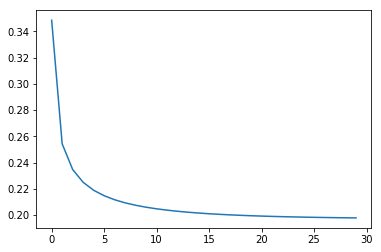

In [11]:
plot.plot(torch.arange(epochs_number).numpy(), np.array(avg_loss))

Plot validation accuracy vs epochs.

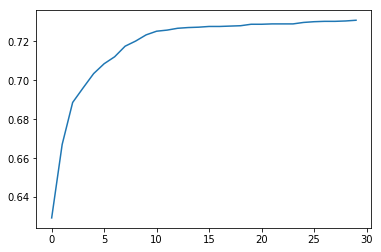

In [12]:
plot.plot(torch.arange(epochs_number).numpy(), np.array(val_acc))

Now let's test the model.

In [13]:
test_acc = metric_acc(linear_model, X_test, Y_test)
print('Test accuracy equals', test_acc)

Test accuracy equals 0.7082847141190198


## Exercise 2

Defining our model.

In [14]:
num_classes = 26
num_features = len(X_train[0])
epochs_number = 30
batch_size= 4
hidden_size = 200
learning_rate = 1e-2
reg_param = 0.001
dropout_param = 0.25

layer1 = torch.nn.Linear(num_features, hidden_size)
layer2 = torch.nn.Linear(hidden_size, num_classes)
mlp = torch.nn.Sequential(layer1, torch.nn.ReLU(), torch.nn.Dropout(dropout_param), layer2)                        

optimizer = torch.optim.SGD(mlp.parameters(), lr=learning_rate, weight_decay=reg_param)


Now let's train our model with SGD optimizer and ReLu activations.

In [15]:
if(train == True):
    [avg_loss, val_acc] = train_model(mlp, optimizer, X_train, Y_train, X_validation, Y_validation, epochs_number, batch_size)
    torch.save(mlp.state_dict(), 'mlp_SGD_ReLu.model')
else:
    mlp.load_state_dict(torch.load('mlp_SGD_ReLu.model'))
        

Epoch loss: 0.275478
Epoch val acc: 0.576440
Epoch loss: 0.174209
Epoch val acc: 0.635528
Epoch loss: 0.152707
Epoch val acc: 0.670981
Epoch loss: 0.139331
Epoch val acc: 0.691990
Epoch loss: 0.130348
Epoch val acc: 0.709435
Epoch loss: 0.124340
Epoch val acc: 0.725567
Epoch loss: 0.119961
Epoch val acc: 0.735509
Epoch loss: 0.115513
Epoch val acc: 0.740386
Epoch loss: 0.112400
Epoch val acc: 0.742450
Epoch loss: 0.109928
Epoch val acc: 0.745826
Epoch loss: 0.108841
Epoch val acc: 0.749578
Epoch loss: 0.106563
Epoch val acc: 0.757081
Epoch loss: 0.104679
Epoch val acc: 0.760458
Epoch loss: 0.103898
Epoch val acc: 0.765710
Epoch loss: 0.102434
Epoch val acc: 0.764022
Epoch loss: 0.101443
Epoch val acc: 0.766460
Epoch loss: 0.100525
Epoch val acc: 0.769649
Epoch loss: 0.099688
Epoch val acc: 0.769649
Epoch loss: 0.099142
Epoch val acc: 0.776215
Epoch loss: 0.098552
Epoch val acc: 0.773776
Epoch loss: 0.097563
Epoch val acc: 0.774339
Epoch loss: 0.097025
Epoch val acc: 0.773964
Epoch loss

Plot training loss vs epochs.

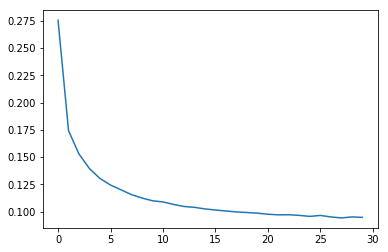

In [16]:
plot.plot(torch.arange(epochs_number).numpy(), np.array(avg_loss))

Plot validation accuracy vs epochs.

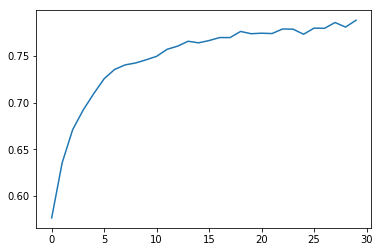

In [17]:
plot.plot(torch.arange(epochs_number).numpy(), np.array(val_acc))

Now let's test the model.

In [18]:
test_acc = metric_acc(mlp, X_test, Y_test)
print('Test accuracy equals', test_acc)

Test accuracy equals 0.7693504472967717


Adam Optimizer

In [19]:
optimizer = torch.optim.Adam(mlp.parameters(), lr=learning_rate, weight_decay=reg_param)

In [20]:
if(train == True):
    [avg_loss, val_acc] = train_model(mlp, optimizer, X_train, Y_train, X_validation, Y_validation, epochs_number, batch_size)
    torch.save(mlp.state_dict(), 'mlp_Adam_ReLu.modell')
else:
    mlp.load_state_dict(torch.load('mlp_Adam_ReLu.model'))

Epoch loss: 0.239323
Epoch val acc: 0.482086
Epoch loss: 0.236476
Epoch val acc: 0.483399
Epoch loss: 0.242459
Epoch val acc: 0.479460
Epoch loss: 0.238391
Epoch val acc: 0.473082
Epoch loss: 0.235087
Epoch val acc: 0.476458
Epoch loss: 0.235555
Epoch val acc: 0.460139
Epoch loss: 0.237847
Epoch val acc: 0.464828
Epoch loss: 0.242567
Epoch val acc: 0.493341
Epoch loss: 0.238302
Epoch val acc: 0.475333
Epoch loss: 0.237113
Epoch val acc: 0.456575
Epoch loss: 0.241647
Epoch val acc: 0.459201
Epoch loss: 0.238480
Epoch val acc: 0.452073
Epoch loss: 0.239821
Epoch val acc: 0.475145
Epoch loss: 0.239143
Epoch val acc: 0.455637
Epoch loss: 0.233984
Epoch val acc: 0.477959
Epoch loss: 0.235013
Epoch val acc: 0.492403
Epoch loss: 0.232700
Epoch val acc: 0.474207
Epoch loss: 0.239066
Epoch val acc: 0.478147
Epoch loss: 0.240897
Epoch val acc: 0.494279
Epoch loss: 0.238727
Epoch val acc: 0.459201
Epoch loss: 0.237539
Epoch val acc: 0.481523
Epoch loss: 0.239116
Epoch val acc: 0.480023
Epoch loss

Training loss vs epochs - Adam.

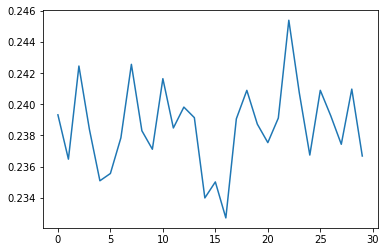

In [21]:
plot.plot(torch.arange(epochs_number).numpy(), np.array(avg_loss))

Validation accuracy vs epochs - Adam.

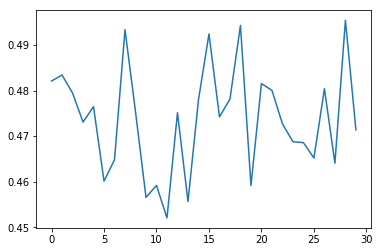

In [22]:
plot.plot(torch.arange(epochs_number).numpy(), np.array(val_acc))

Test results.

In [23]:
test_acc = metric_acc(mlp, X_test, Y_test)
print('Test accuracy equals', test_acc)

Test accuracy equals 0.46518864255153636


Adagrad Optimizer

In [24]:
optimizer = torch.optim.Adagrad(mlp.parameters(), lr=learning_rate, weight_decay=reg_param)

Train

In [25]:
if(train == True):
    [avg_loss, val_acc] = train_model(mlp, optimizer, X_train, Y_train, X_validation, Y_validation, epochs_number, batch_size)
    torch.save(mlp.state_dict(), 'mlp_Adagrad_ReLu.model')
else:
    mlp.load_state_dict(torch.load('mlp_Adagrad_ReLu.model'))

Epoch loss: 0.244500
Epoch val acc: 0.666292
Epoch loss: 0.211297
Epoch val acc: 0.698931
Epoch loss: 0.200837
Epoch val acc: 0.718627
Epoch loss: 0.193797
Epoch val acc: 0.729694
Epoch loss: 0.191907
Epoch val acc: 0.744326
Epoch loss: 0.189307
Epoch val acc: 0.756894
Epoch loss: 0.185486
Epoch val acc: 0.753705
Epoch loss: 0.184465
Epoch val acc: 0.757644
Epoch loss: 0.180351
Epoch val acc: 0.764960
Epoch loss: 0.179713
Epoch val acc: 0.774339
Epoch loss: 0.176998
Epoch val acc: 0.777153
Epoch loss: 0.175595
Epoch val acc: 0.779966
Epoch loss: 0.175277
Epoch val acc: 0.779779
Epoch loss: 0.173621
Epoch val acc: 0.780904
Epoch loss: 0.171849
Epoch val acc: 0.779966
Epoch loss: 0.169620
Epoch val acc: 0.789345
Epoch loss: 0.169188
Epoch val acc: 0.790846
Epoch loss: 0.167351
Epoch val acc: 0.785031
Epoch loss: 0.166888
Epoch val acc: 0.789721
Epoch loss: 0.166524
Epoch val acc: 0.788783
Epoch loss: 0.164642
Epoch val acc: 0.792909
Epoch loss: 0.162815
Epoch val acc: 0.795723
Epoch loss

Training loss vs epochs - Adagrad.

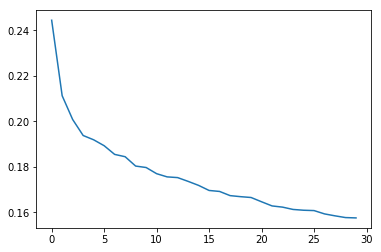

In [26]:
plot.plot(torch.arange(epochs_number).numpy(), np.array(avg_loss))

Validation accuracy vs epochs - Adagrad.

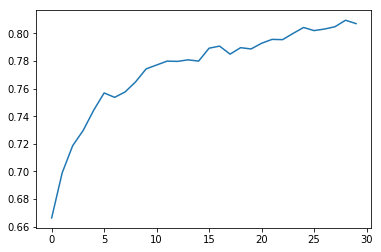

In [27]:
plot.plot(torch.arange(epochs_number).numpy(), np.array(val_acc))

Test results.

In [28]:
test_acc = metric_acc(mlp, X_test, Y_test)
print('Test accuracy equals', test_acc)

Test accuracy equals 0.7907429015947103


Now let's set the optimizer back to SGD and try different activation functions. Let's begin with tanh.

In [29]:
mlp = torch.nn.Sequential(layer1, torch.nn.Tanh(), torch.nn.Dropout(dropout_param), layer2)                        

optimizer = torch.optim.SGD(mlp.parameters(), lr=learning_rate, weight_decay=reg_param)


Train

In [30]:
if(train == True):
    [avg_loss, val_acc] = train_model(mlp, optimizer, X_train, Y_train, X_validation, Y_validation, epochs_number, batch_size)
    torch.save(mlp.state_dict(), 'mlp_SGD_tanh.model')
else:
    mlp.load_state_dict(torch.load('mlp_SGD_tanh.model'))

Epoch loss: 0.147997
Epoch val acc: 0.700994
Epoch loss: 0.137569
Epoch val acc: 0.703808
Epoch loss: 0.135321
Epoch val acc: 0.703245
Epoch loss: 0.134084
Epoch val acc: 0.703620
Epoch loss: 0.132619
Epoch val acc: 0.715438
Epoch loss: 0.132146
Epoch val acc: 0.710373
Epoch loss: 0.130927
Epoch val acc: 0.712812
Epoch loss: 0.129976
Epoch val acc: 0.707184
Epoch loss: 0.129835
Epoch val acc: 0.704746
Epoch loss: 0.129000
Epoch val acc: 0.712062
Epoch loss: 0.129114
Epoch val acc: 0.716188
Epoch loss: 0.128186
Epoch val acc: 0.719377
Epoch loss: 0.127036
Epoch val acc: 0.714875
Epoch loss: 0.127426
Epoch val acc: 0.726318
Epoch loss: 0.126072
Epoch val acc: 0.725755
Epoch loss: 0.127162
Epoch val acc: 0.725943
Epoch loss: 0.125755
Epoch val acc: 0.718814
Epoch loss: 0.125893
Epoch val acc: 0.722003
Epoch loss: 0.125601
Epoch val acc: 0.720878
Epoch loss: 0.124453
Epoch val acc: 0.718064
Epoch loss: 0.124746
Epoch val acc: 0.724254
Epoch loss: 0.124626
Epoch val acc: 0.718439
Epoch loss

Train loss vs epochs - tanh.

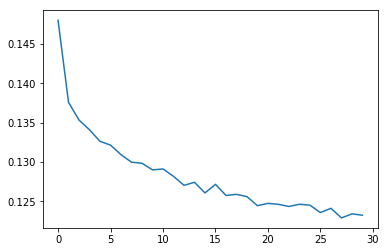

In [31]:
plot.plot(torch.arange(epochs_number).numpy(), np.array(avg_loss))

Validation accuracy vs epochs - tanh.

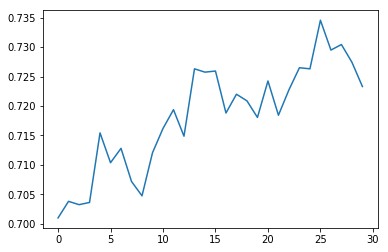

In [32]:
plot.plot(torch.arange(epochs_number).numpy(), np.array(val_acc))

Test results.

In [33]:
test_acc = metric_acc(mlp, X_test, Y_test)
print('Test accuracy equals', test_acc)

Test accuracy equals 0.704784130688448


Sigmoid activations.

In [34]:
mlp = torch.nn.Sequential(layer1, torch.nn.Sigmoid(), torch.nn.Dropout(dropout_param), layer2)       

Train

In [35]:
if(train == True):
    [avg_loss, val_acc] = train_model(mlp, optimizer, X_train, Y_train, X_validation, Y_validation, epochs_number, batch_size)
    torch.save(mlp.state_dict(), 'mlp_SGD_sigmoid.model')
else:
    mlp.load_state_dict(torch.load('mlp_SGD_sigmoid.model'))

Epoch loss: 0.230561
Epoch val acc: 0.570625
Epoch loss: 0.196788
Epoch val acc: 0.599137
Epoch loss: 0.189532
Epoch val acc: 0.614894
Epoch loss: 0.185584
Epoch val acc: 0.626149
Epoch loss: 0.182739
Epoch val acc: 0.622397
Epoch loss: 0.180753
Epoch val acc: 0.636466
Epoch loss: 0.179589
Epoch val acc: 0.633465
Epoch loss: 0.179575
Epoch val acc: 0.638154
Epoch loss: 0.178274
Epoch val acc: 0.639467
Epoch loss: 0.177665
Epoch val acc: 0.641343
Epoch loss: 0.177548
Epoch val acc: 0.645845
Epoch loss: 0.177965
Epoch val acc: 0.642469
Epoch loss: 0.177392
Epoch val acc: 0.644532
Epoch loss: 0.176927
Epoch val acc: 0.641906
Epoch loss: 0.176988
Epoch val acc: 0.638154
Epoch loss: 0.177144
Epoch val acc: 0.643782
Epoch loss: 0.177294
Epoch val acc: 0.640968
Epoch loss: 0.176571
Epoch val acc: 0.639842
Epoch loss: 0.176586
Epoch val acc: 0.643594
Epoch loss: 0.176379
Epoch val acc: 0.639092
Epoch loss: 0.176522
Epoch val acc: 0.637591
Epoch loss: 0.176466
Epoch val acc: 0.641906
Epoch loss

Train loss vs epochs - sigmoid.

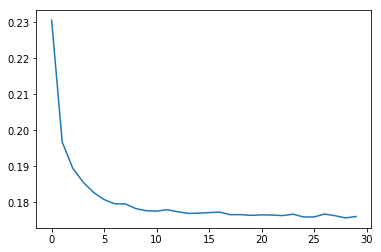

In [36]:
plot.plot(torch.arange(epochs_number).numpy(), np.array(avg_loss))

Validation accuracy vs epochs - sigmoid.

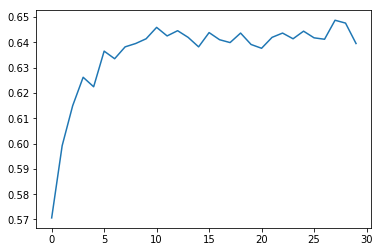

In [37]:
plot.plot(torch.arange(epochs_number).numpy(), np.array(val_acc))

Test results.

In [38]:
test_acc = metric_acc(mlp, X_test, Y_test)
print('Test accuracy equals', test_acc)

Test accuracy equals 0.6338000777907429


## Exercise 3

Defining our model.

In [39]:
num_classes = 26
num_features = len(X_train[0])
epochs_number = 30
batch_size= 4
hidden_size = 200
learning_rate = 1e-2
reg_param = 0.001
dropout_param = 0.5

hidden_size1 = 200
hidden_size2 = 200

layer1 = torch.nn.Linear(num_features, hidden_size1)
layer2 = torch.nn.Linear(hidden_size1, hidden_size2)
layer3 = torch.nn.Linear(hidden_size2, num_classes)

mlp = torch.nn.Sequential(layer1, torch.nn.ReLU(), torch.nn.Dropout(dropout_param), layer2, torch.nn.ReLU(), torch.nn.Dropout(dropout_param), layer3)

optimizer = torch.optim.SGD(mlp.parameters(), lr=learning_rate, weight_decay=reg_param)

In [40]:
if(train == True):
    [avg_loss, val_acc] = train_model(mlp, optimizer, X_train, Y_train, X_validation, Y_validation, epochs_number, batch_size)
    torch.save(mlp.state_dict(), 'mlp_SGD_ReLu_hidden+.model')
else:
    mlp.load_state_dict(torch.load('mlp_SGD_ReLu_hidden+.model'))

Epoch loss: 0.339579
Epoch val acc: 0.519977
Epoch loss: 0.209848
Epoch val acc: 0.574001
Epoch loss: 0.179719
Epoch val acc: 0.618646
Epoch loss: 0.165659
Epoch val acc: 0.651660
Epoch loss: 0.155099
Epoch val acc: 0.657475
Epoch loss: 0.146962
Epoch val acc: 0.669293
Epoch loss: 0.142153
Epoch val acc: 0.685237
Epoch loss: 0.137291
Epoch val acc: 0.681298
Epoch loss: 0.135381
Epoch val acc: 0.693866
Epoch loss: 0.131464
Epoch val acc: 0.695929
Epoch loss: 0.130992
Epoch val acc: 0.709248
Epoch loss: 0.128885
Epoch val acc: 0.704558
Epoch loss: 0.127656
Epoch val acc: 0.711124
Epoch loss: 0.126032
Epoch val acc: 0.705684
Epoch loss: 0.124385
Epoch val acc: 0.708497
Epoch loss: 0.123907
Epoch val acc: 0.711124
Epoch loss: 0.123025
Epoch val acc: 0.715626
Epoch loss: 0.123356
Epoch val acc: 0.711124
Epoch loss: 0.122861
Epoch val acc: 0.720315
Epoch loss: 0.121038
Epoch val acc: 0.724442
Epoch loss: 0.121011
Epoch val acc: 0.717501
Epoch loss: 0.120696
Epoch val acc: 0.714875
Epoch loss

Plot training loss vs epochs.

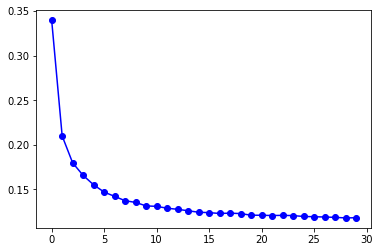

In [44]:
plot.plot(torch.arange(epochs_number).numpy(), np.array(avg_loss), marker='o', color='b')

Plot validation accuracy vs epochs.

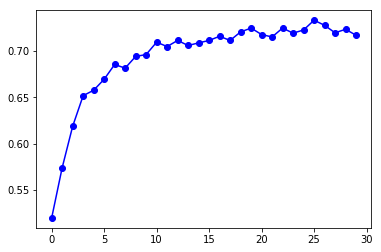

In [45]:
plot.plot(torch.arange(epochs_number).numpy(), np.array(val_acc), marker='o', color='b')

Now let's test the model.

In [46]:
test_acc = metric_acc(mlp, X_test, Y_test)
print('Test accuracy equals', test_acc)

Test accuracy equals 0.7077012835472579
